In [1]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Rectangle
import math 

In [2]:
# Recibe la dirección del root. Retorna un DataFrame con la información del evento.

def Data(File_name,treename):
    # Se asegura que el nombre del archivo y la carpeta asociada al archivo sean tipo string
    
    if type(File_name) and type(treename) == str:
        upfile = {}
        Datos = {}
        upfile['read'] = uproot.open(File_name)
        Datos['info'] = pd.DataFrame(upfile['read'][treename].arrays())
        return Datos['info']
    else:
        print("File_name debe ser la dirección de los datos") 

In [3]:
def Z_to_Di_Lepton(Datos,Lepton):
    
    # Comprueba que Lepton sea un string
    if type(Lepton) == str:
       
        # Número total de eventos
        total = np.size(Datos[Lepton+'_ch'])
        #print(total)
        
        # Contador para los índices 
        cont = 0
        
        # Verifica que sean dileptones y carga opuesta. Cuenta todos los que cumplen la condición.
        for i in range (0,total):
            if (Datos['n'+Lepton+'_e'][i]==2):
                if (np.sum(Datos[Lepton+'_ch'][i])==0):
                    cont  =  cont + 1
        
       
        # Reserva memoria para Energía, Phi, Eta, Px, Py, Pz, Pt
        Energia = np.ones((cont,2))
        Phi = np.ones((cont,2))
        Eta = np.ones((cont,2))
        Px = np.ones((cont,2))
        Py = np.ones((cont,2))
        Pz = np.ones((cont,2))
        Pt = np.ones((cont,2))
        
    
        cont = 0 
        
        # Almacena la Energía, Phi, Eta, Px, Py, Pz 
        for i in range (0,total):
            if (Datos['n'+Lepton+'_e'][i]==2):
                if (np.sum(Datos[Lepton+'_ch'][i])==0):
                    Px[cont][:] = Datos[Lepton+'_px'][i]
                    Py[cont][:] = Datos[Lepton+'_py'][i]
                    Pz[cont][:] = Datos[Lepton+'_pz'][i]
                    Pt[cont][:] = Datos[Lepton+'_pt'][i]
                    
                    Energia[cont][:] = Datos[Lepton+'_e'][i]
                    Phi[cont][:] = Datos[Lepton+'_phi'][i]
                    Eta[cont][:] = Datos[Lepton+'_eta'][i]
                    
                    cont = cont + 1
        
        return Energia,Phi,Eta,Px,Py,Pz,Pt,cont
    
    else:
        return "Lepton debe ser un string."


In [11]:
# Masa invariante formula eta phi pt
def invariant_mass(eta,phi,pt,energia):
    invariant_mass=np.ones((len(eta),1))
    cont  = 0
    for i in range(len(eta)):
        invariant_mass[i][0]=np.sqrt(2*pt[i][0]*pt[i][1]*(np.cosh(eta[i][0]-eta[i][1])-np.cos(phi[i][0]-phi[i][1])))
        
        #if (invariant_mass[i][0]>=91 and invariant_mass[i][0]<=91.2):
            #print(invariant_mass[i][0])
            #images(cont,energia[i][:],eta[i][:],phi[i][:])
            #cont = cont + 1
        #if (invariant_mass[i][0]<60):
            #if (cont<435):
                #print(invariant_mass[i][0])
                #images(cont,energia[i][:],eta[i][:],phi[i][:]) 
                #cont = cont + 1 
    return invariant_mass

In [5]:
# total debe ser número de leptones que cumple con dos condiciones.
    # 1. Un evento que termina en dilepton.
    # 2. Un dilepton de carga opuesta.
# El valor total se obtiene de la función "Z_to_Di_Lepton". Es el sexto parámetro que devuelve la función. 

def images(cont,Energia,Eta,Phi):
    escalaEnergia1 = math.log(Energia[0],11.0/10.0)
    escalaEnergia2 = math.log(Energia[1],11.0/10.0)
    
    phiAxis1 = np.array([escalaEnergia1*2*np.pi/224])
    phiAxis2 = np.array([escalaEnergia2*2*np.pi/224])
    
    etaAxis1 = np.array([escalaEnergia1*6/224])
    etaAxis2 = np.array([escalaEnergia2*6/224])
    
    center1 = np.array([Eta[0],Phi[0]])
    center2 = np.array([Eta[1],Phi[1]])
    
    fig = plt.figure()
    fig.set_size_inches(4,4)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.axis([-6,6,-2*np.pi,2*np.pi])
    ax.set_axis_off()
    fig.add_axes(ax)
    
    Object1 = Ellipse(xy = center1, width=etaAxis1, height=phiAxis1, angle=0.0, facecolor = 'none', edgecolor= 'black', lw = 4)
    Object2 = Ellipse(xy = center2, width=etaAxis2, height=phiAxis2, angle=0.0, facecolor = 'none', edgecolor= 'black', lw = 4)
    
    ax.add_artist(Object1)
    ax.add_artist(Object2)
    
    Name = 'ru'+ str(cont)
    fig.savefig('Datos/Imagenes/Ruido/'+ Name +'.jpg', dpi=56)

In [6]:
# Dibuja los histogramas 

def Histogram(Data,name_dic):
    Histograma = {}
    Histograma[name_dic] = pd.DataFrame(Data)
    
    %matplotlib inline
    plt.figure(figsize=(10, 10),dpi=1000)
    bins = np.linspace(50, 100, 100)
    Histograma[name_dic].plot.hist(bins=bins, alpha=1, label=name_dic,histtype='step')
    

In [8]:
def genparticles(Datos):
        
        total = len(Datos['GenPart_eta'][:])
        cont = 0
        
        # Verifica que sean dileptones. Cuenta todos los que cumplen la condición.
        for i in range(total):
            if (Datos['nGenPart_eta'][i] == 2):
                cont = cont + 1
        
        # Reserva memoria para  Phi, Eta, Px, Py, Pz, Pt
        Phi = np.ones((cont,2))
        Eta = np.ones((cont,2))
        
        Px = np.ones((cont,2))
        Py = np.ones((cont,2))
        Pz = np.ones((cont,2))
        Pt = np.ones((cont,2))
        
        cont = 0
        for i in range(0,total):
            if (Datos['nGenPart_eta'][i] ==2):
                Eta[cont][:] = Datos['GenPart_eta'][i]
                Phi[cont][:] = Datos['GenPart_phi'][i]
                
                Px[cont][:]  = Datos['GenPart_px'][i]
                Py[cont][:]  = Datos['GenPart_py'][i]
                Pz[cont][:]  = Datos['GenPart_pz'][i]
                Pt[cont][:]  = Datos['GenPart_pt'][i]
                
        return Phi,Eta,Px,Py,Pz,Pt     

In [12]:
Prueba = Data('Datos/roots/Electrones/Electron-Z.root','events')

In [10]:
Energia_prueba,Phi_prueba,Eta_prueba,Px_prueba,Py_prueba,Pz_prueba,Pt_prueba,cont_prueba = Z_to_Di_Lepton(Prueba,"electron")

/cvmfs/cms.cern.ch/slc7_amd64_gcc820/external/py2-matplotlib/2.2.4-pafccj2/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


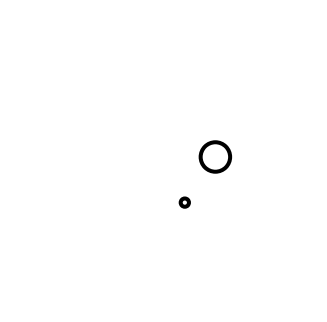

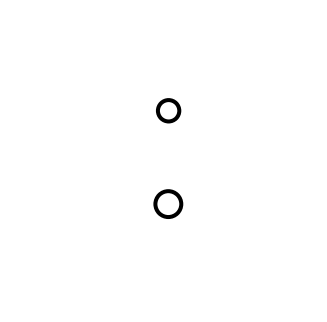

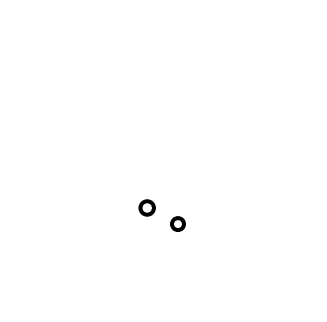

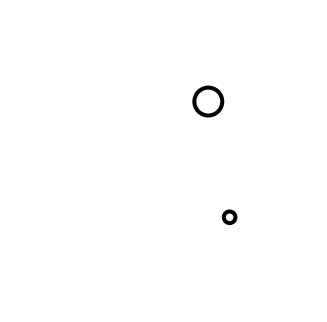

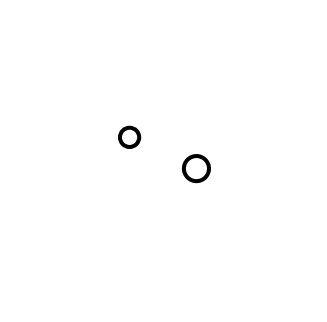

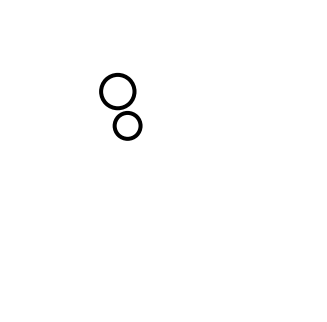

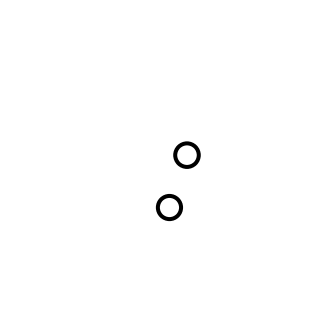

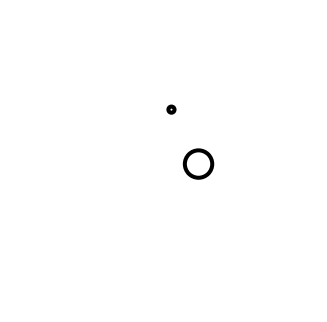

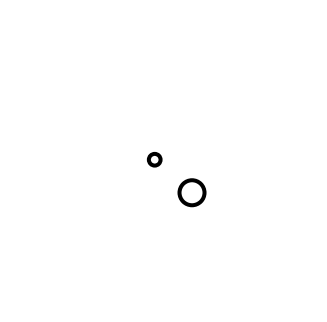

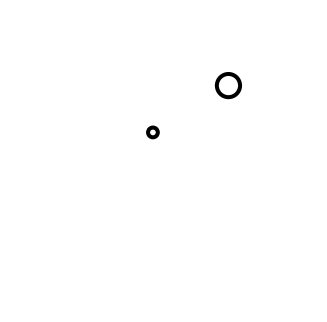

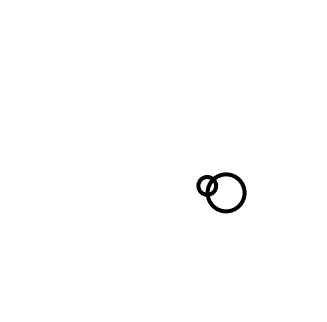

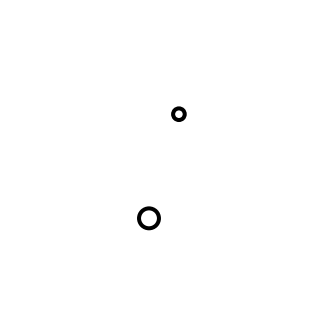

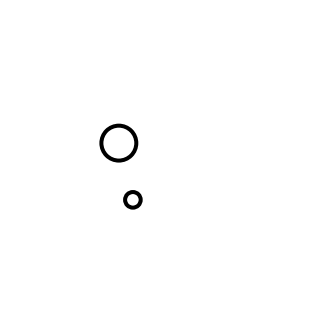

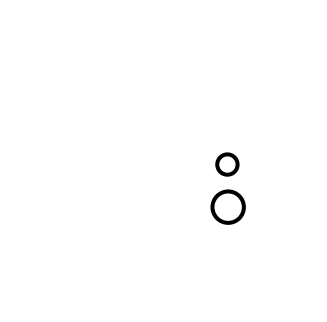

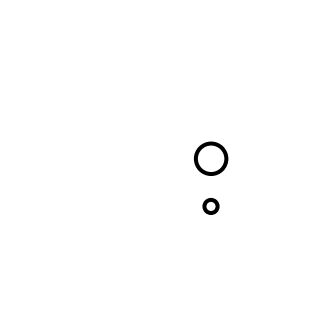

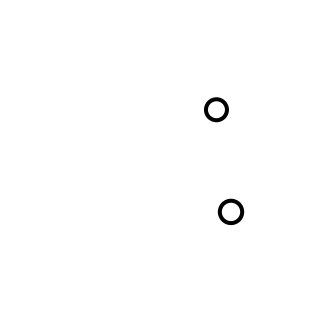

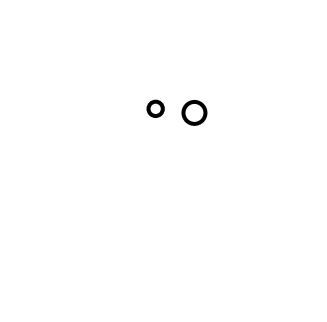

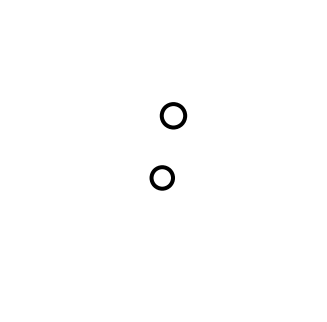

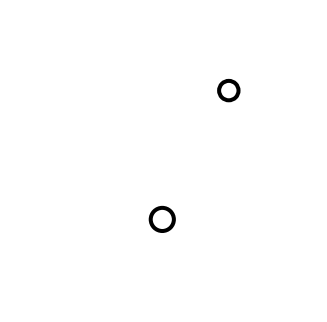

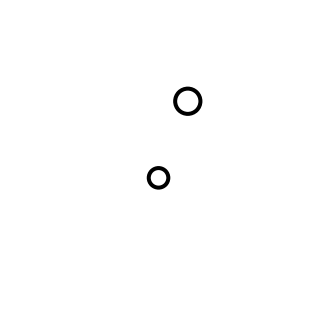

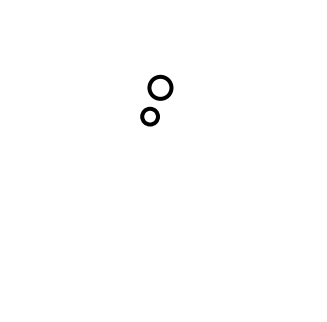

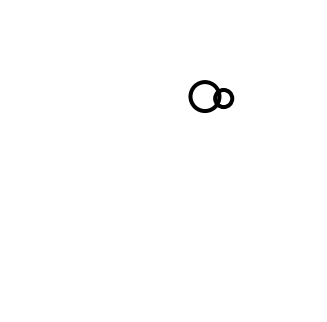

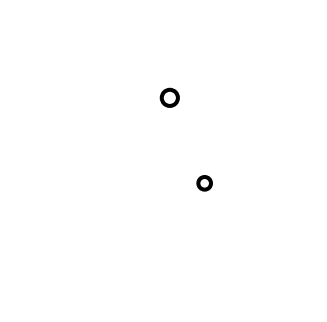

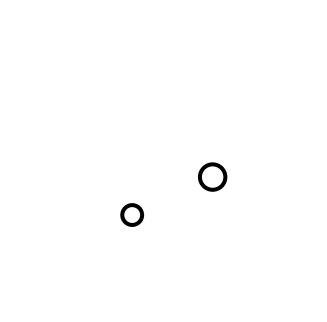

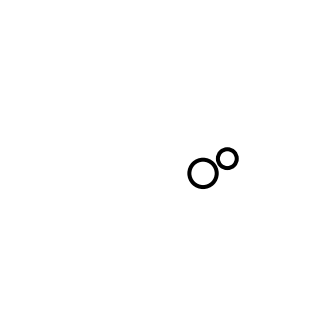

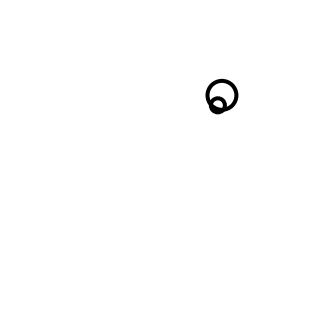

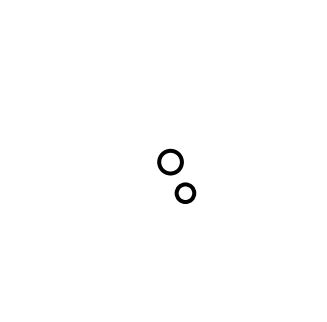

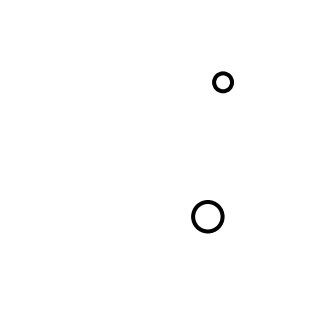

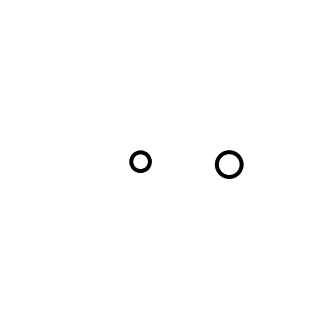

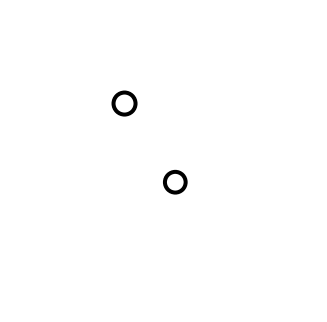

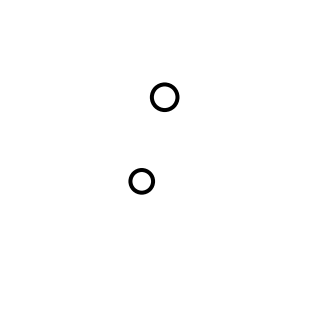

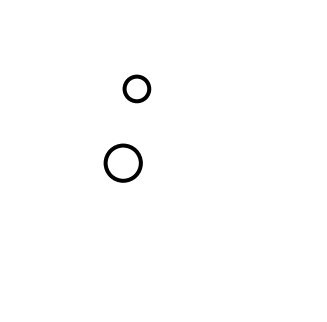

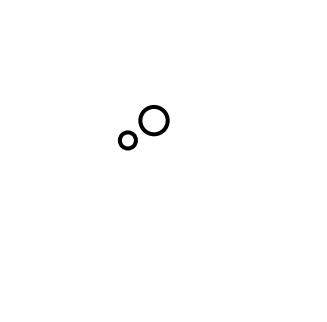

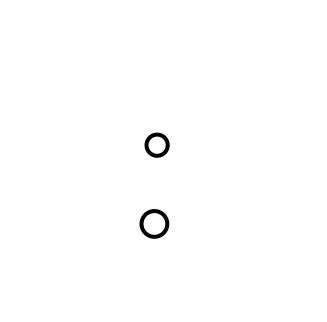

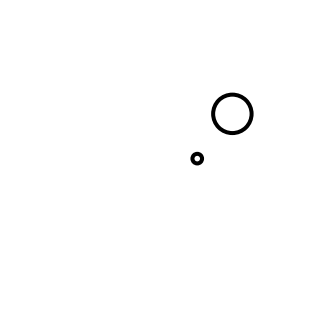

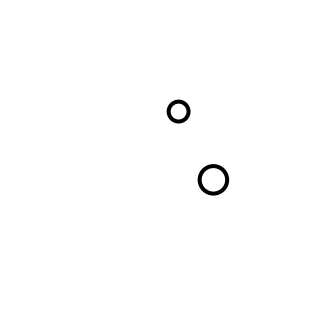

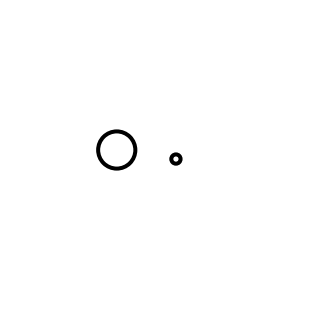

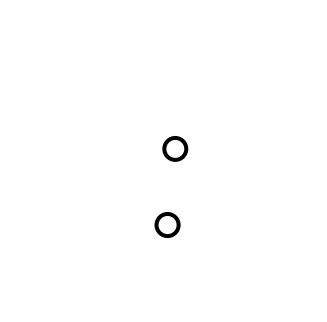

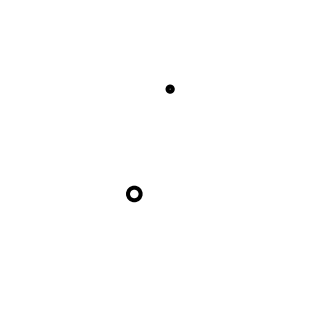

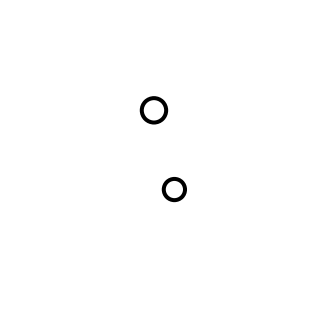

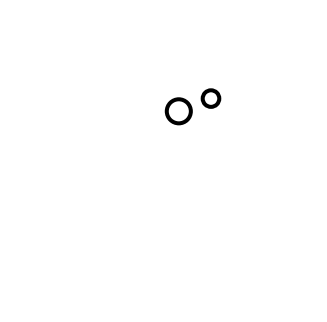

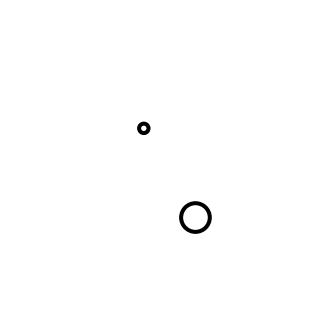

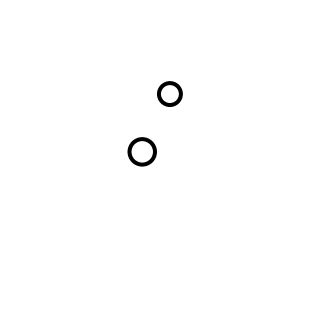

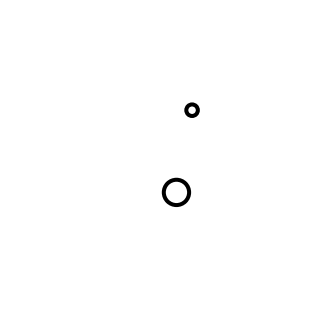

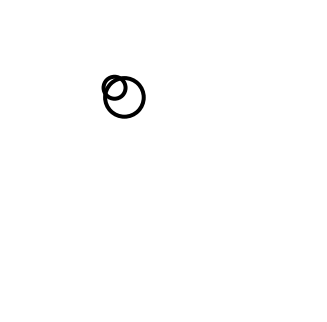

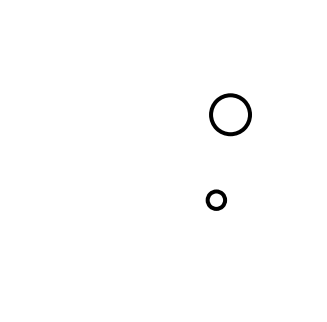

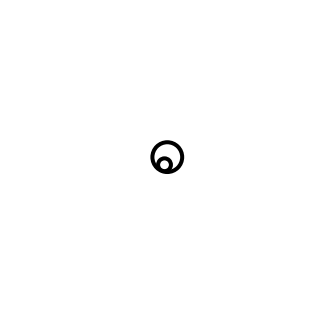

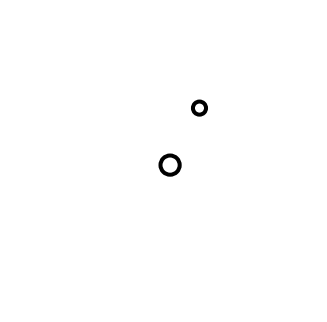

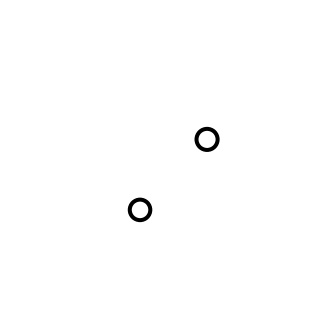

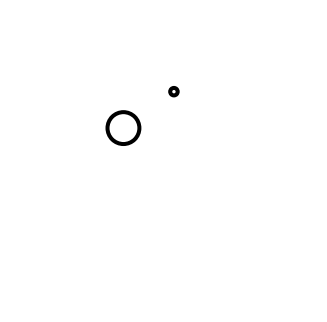

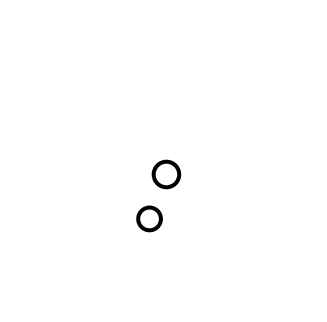

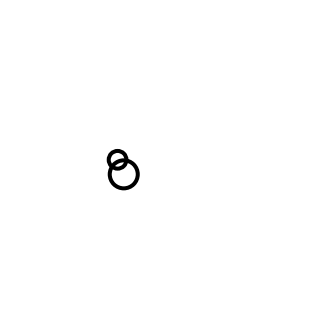

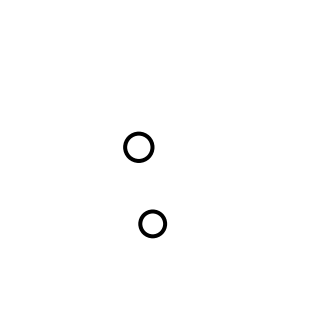

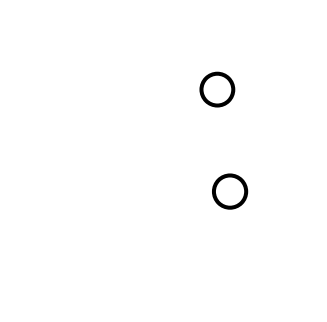

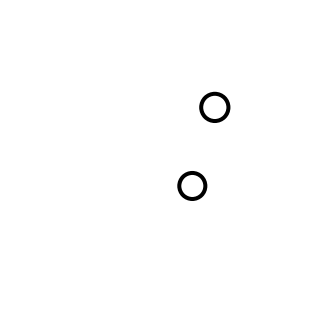

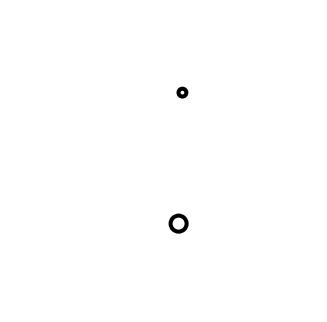

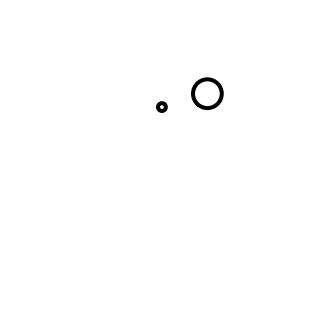

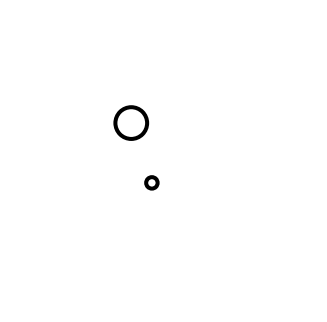

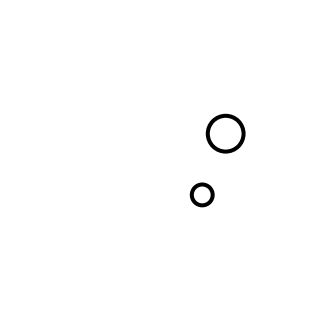

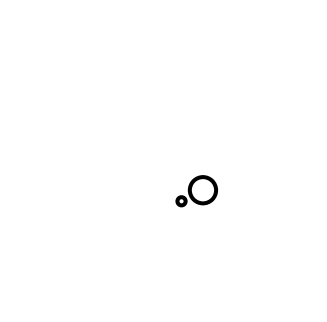

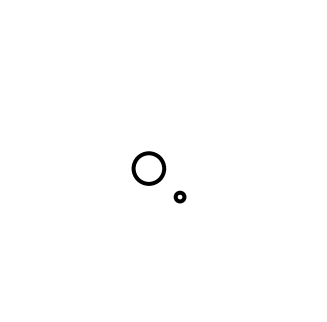

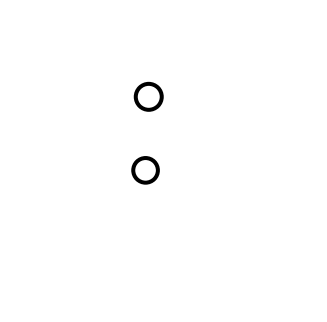

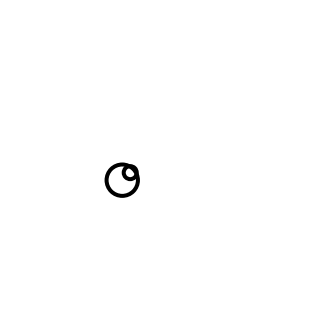

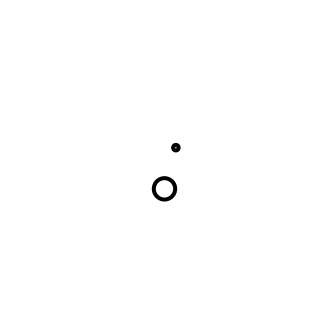

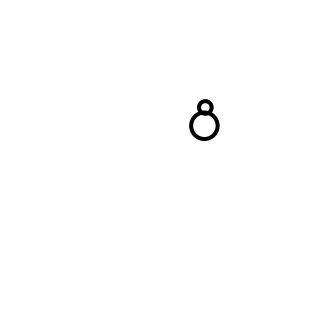

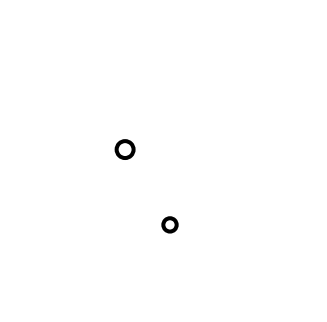

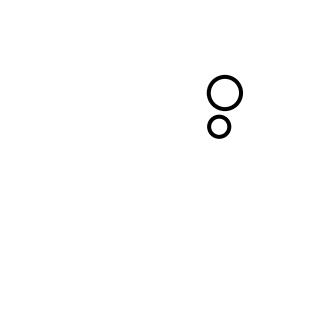

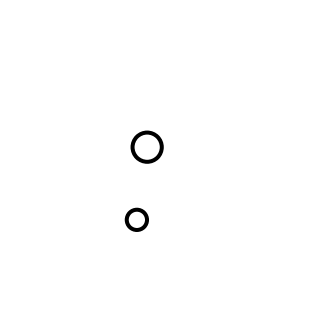

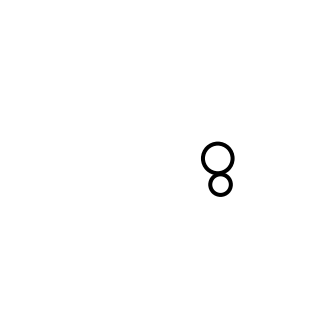

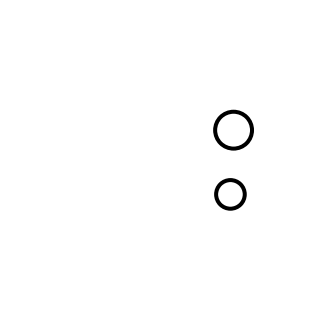

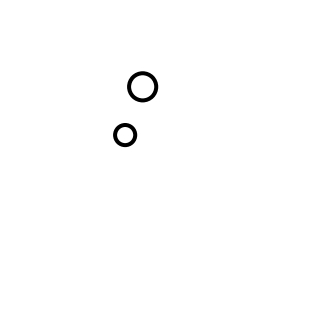

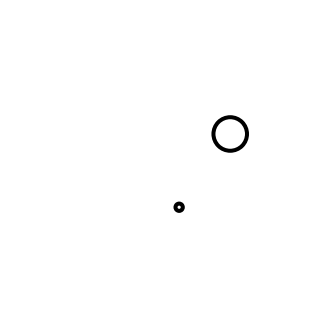

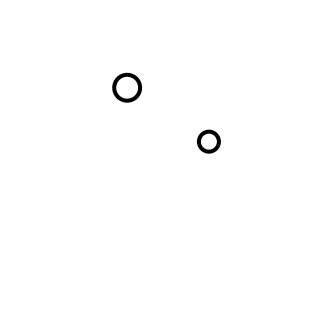

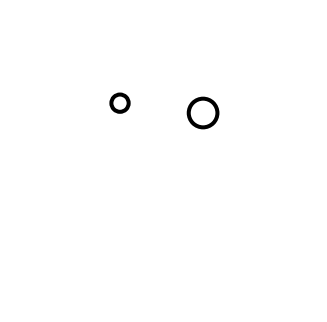

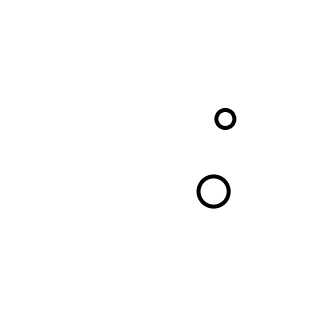

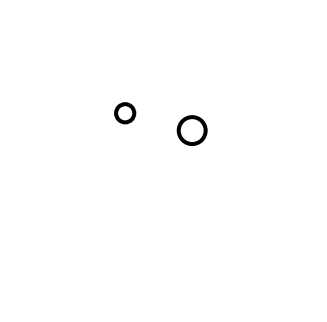

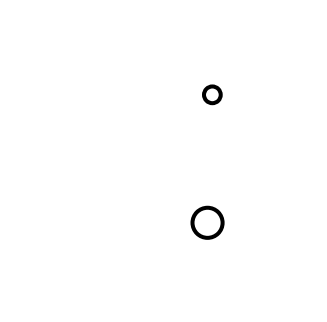

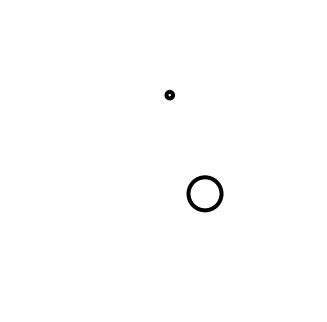

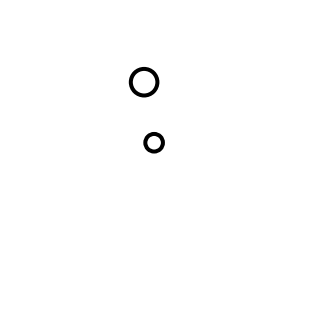

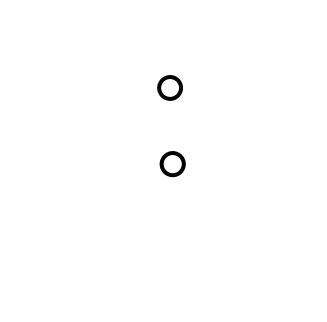

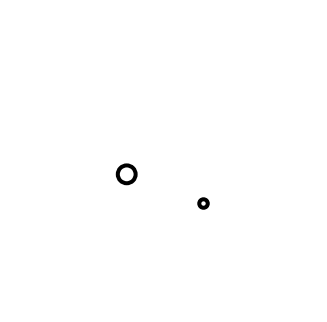

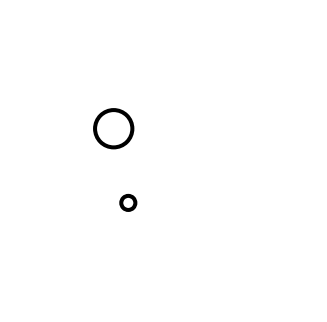

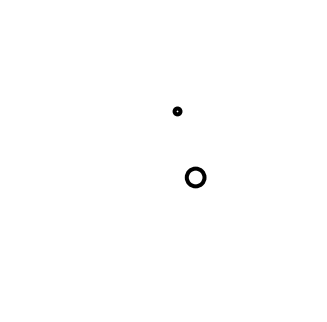

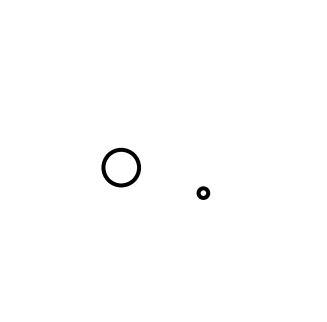

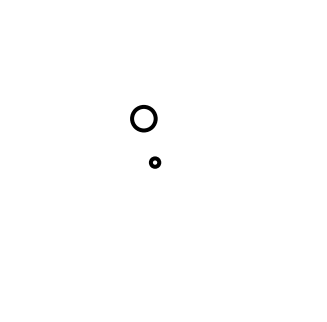

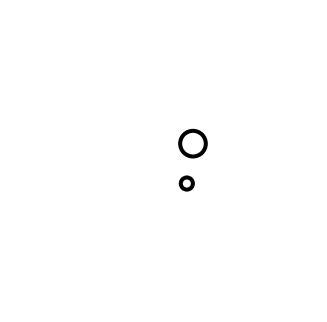

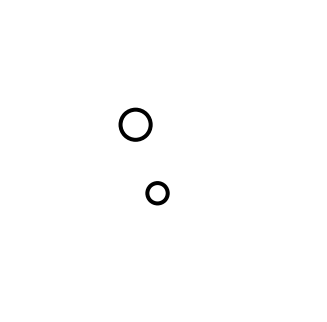

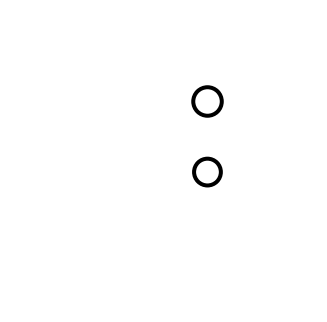

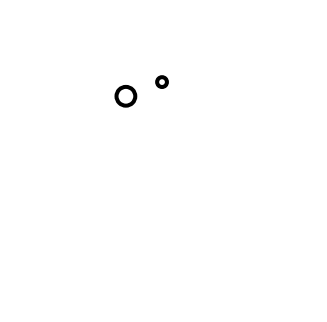

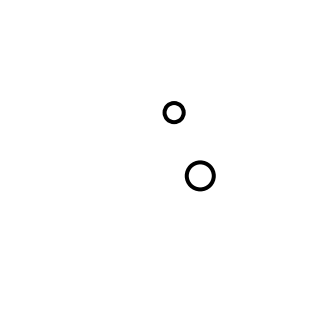

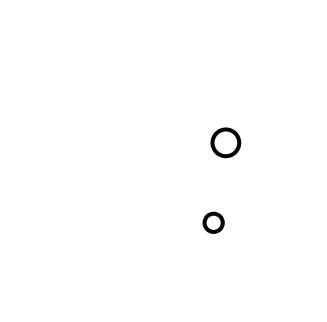

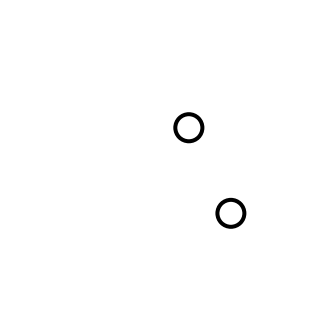

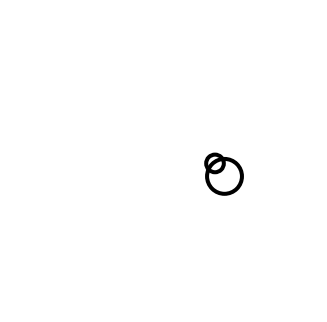

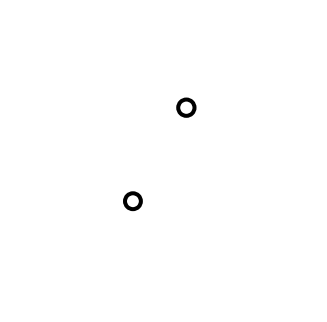

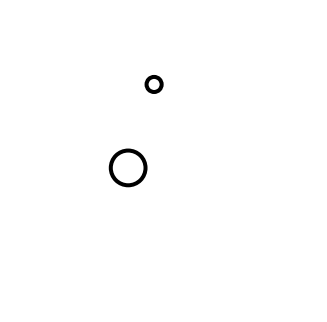

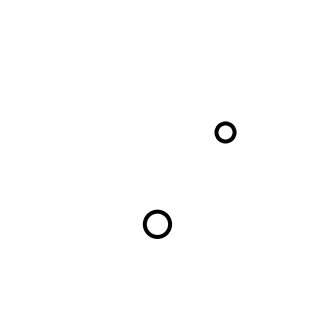

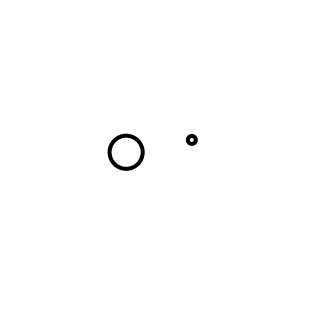

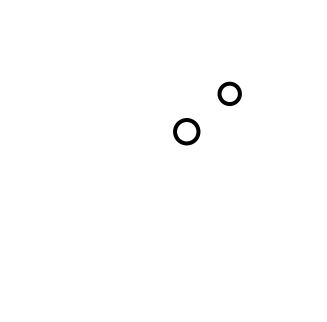

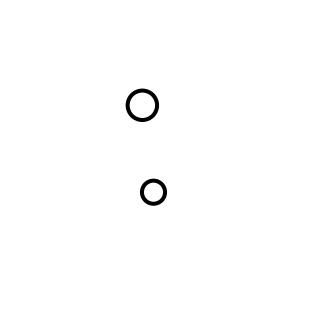

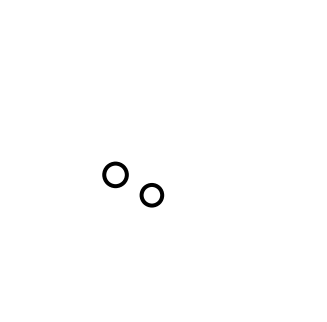

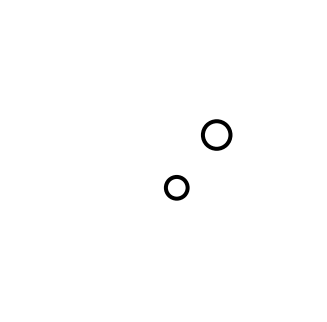

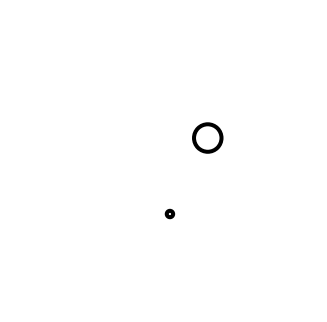

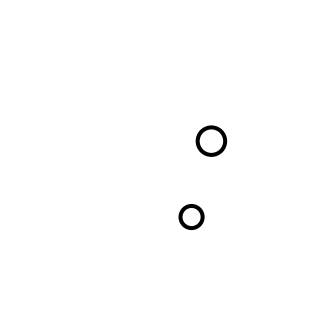

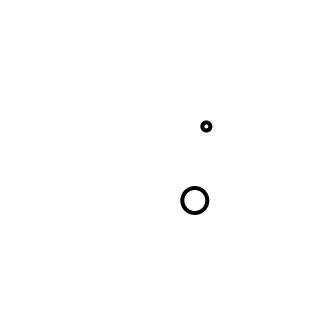

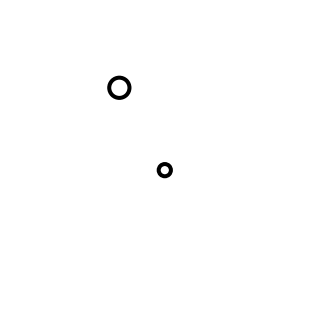

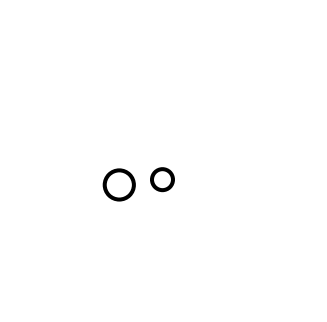

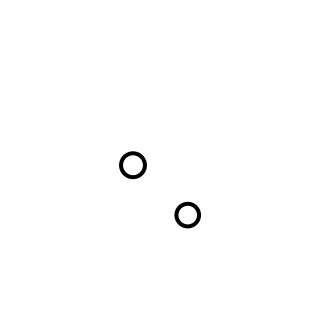

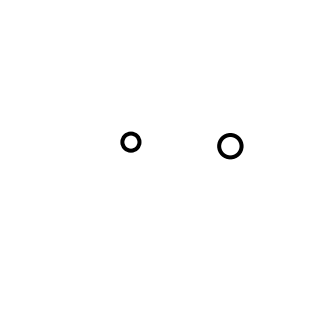

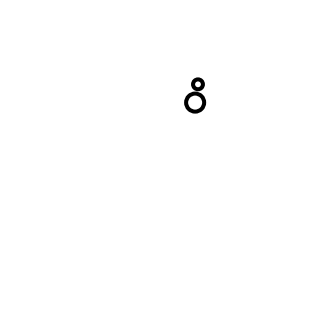

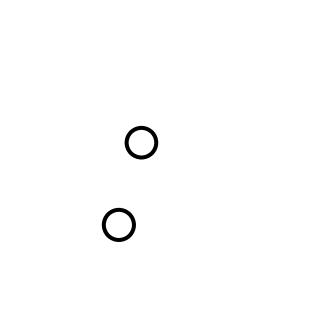

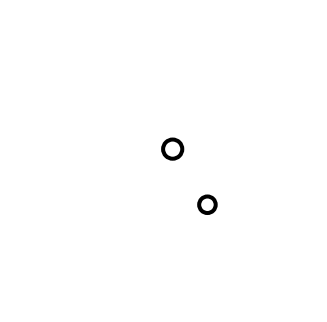

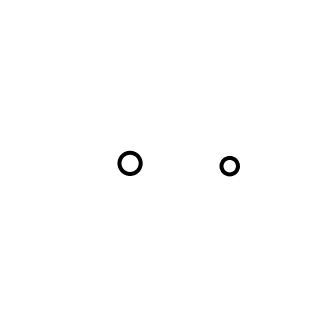

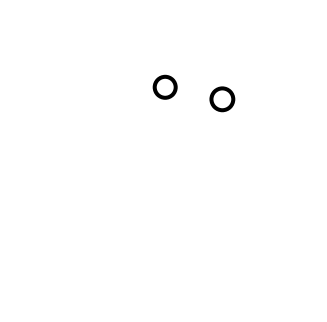

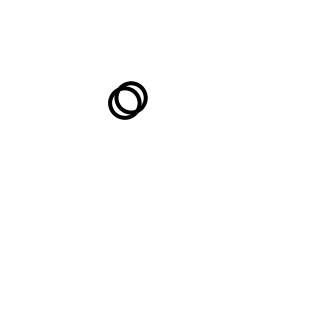

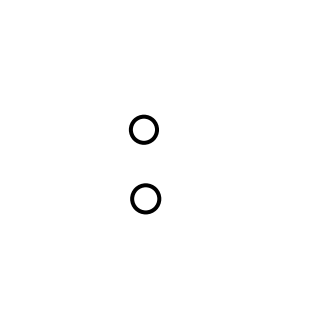

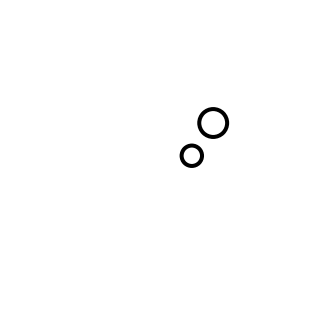

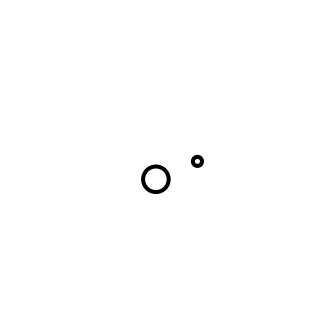

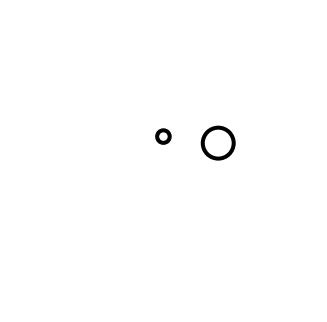

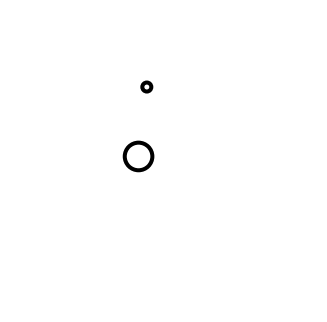

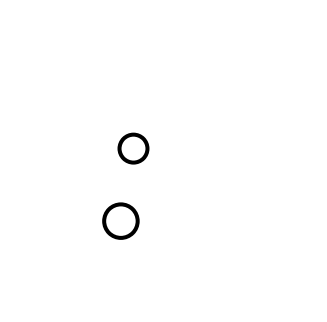

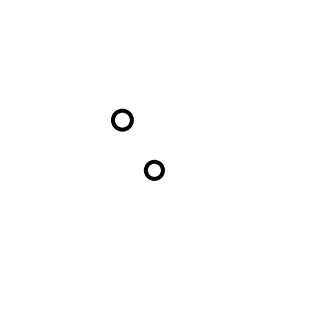

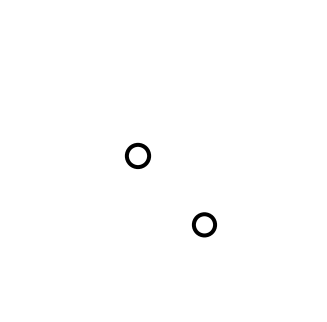

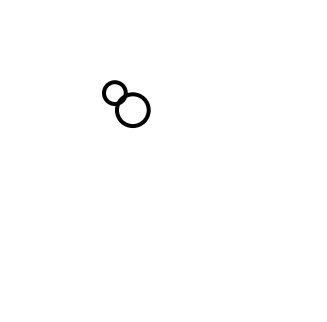

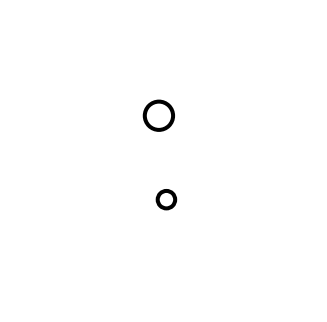

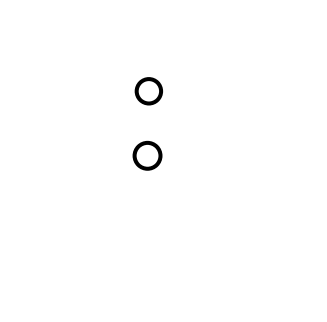

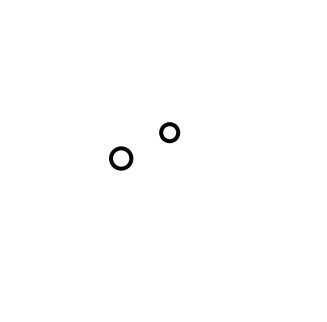

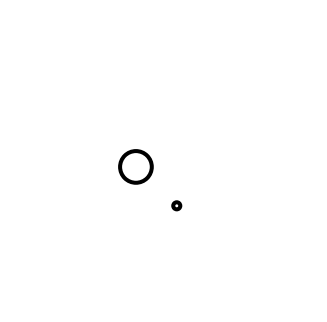

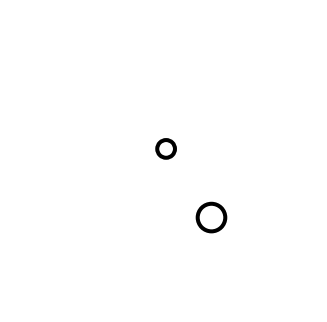

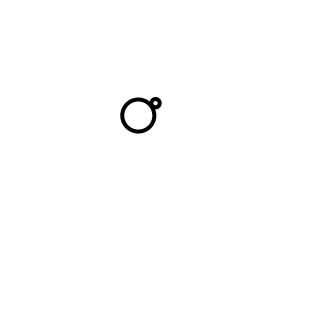

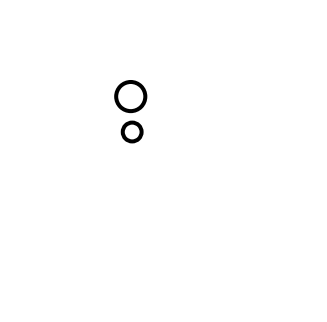

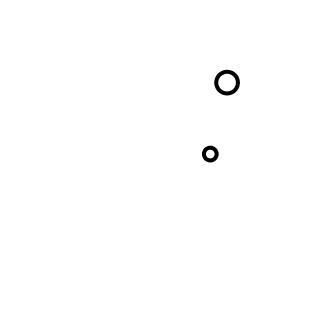

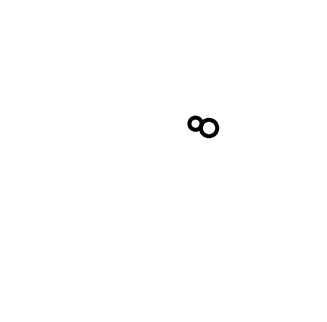

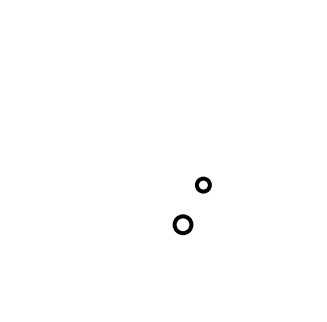

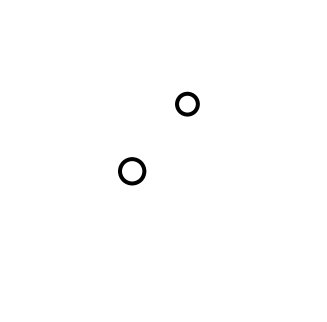

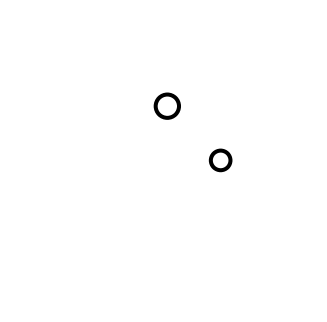

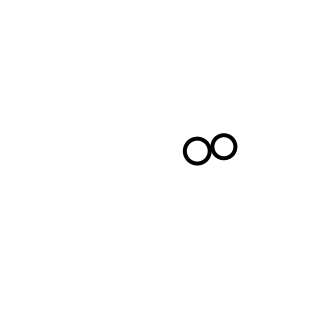

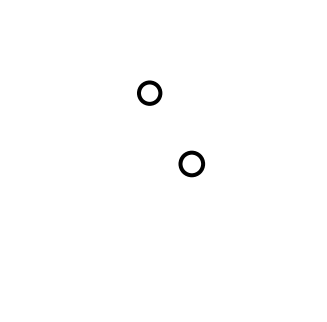

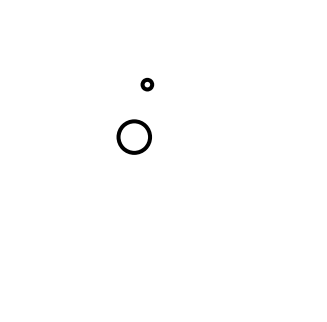

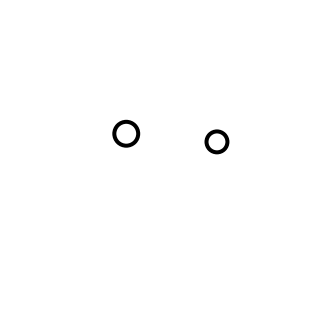

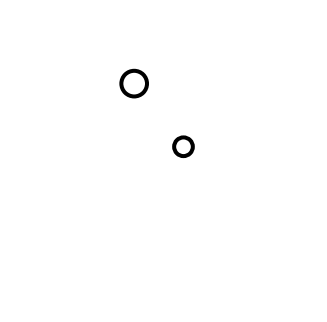

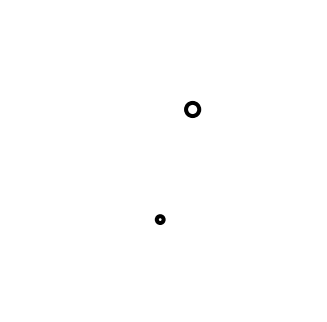

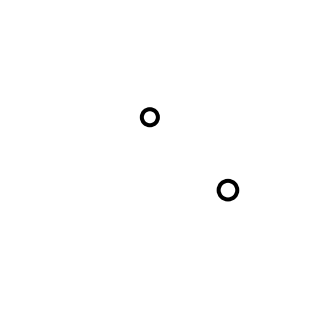

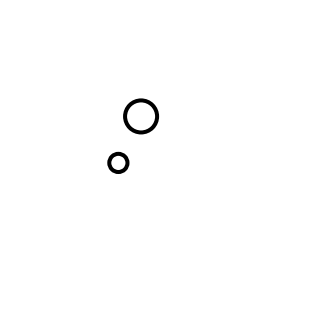

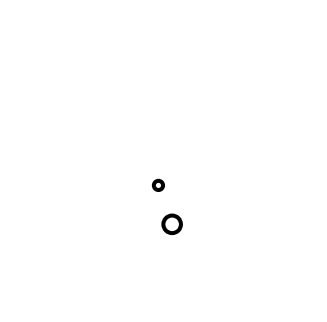

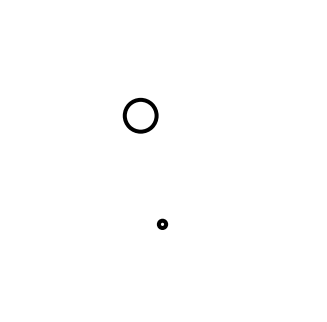

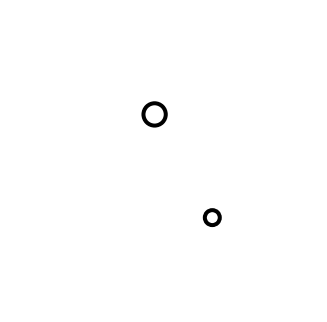

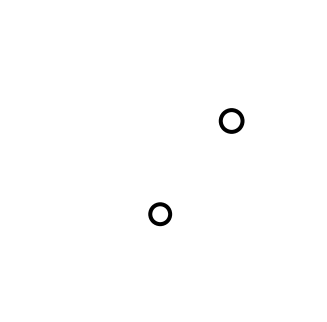

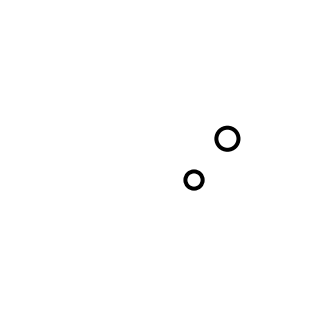

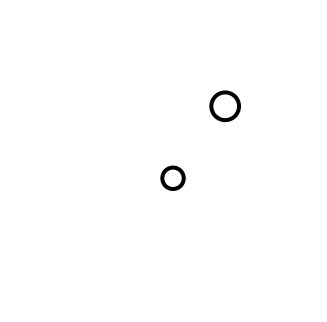

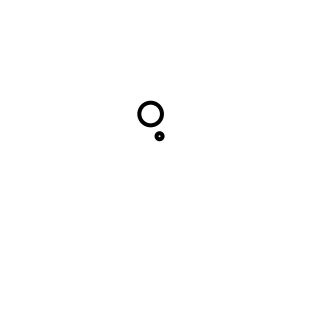

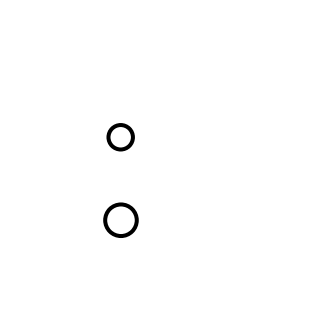

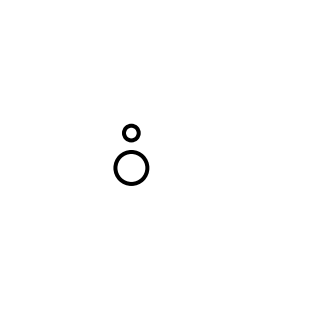

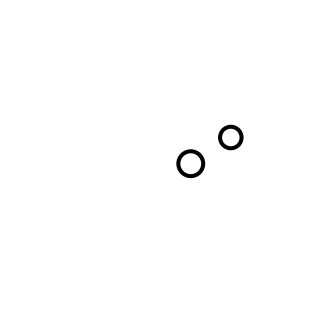

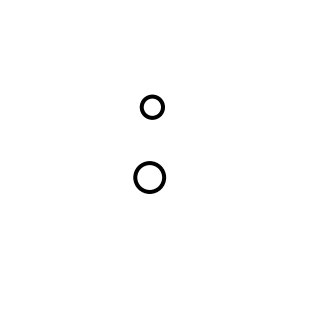

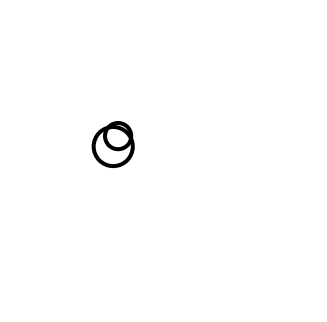

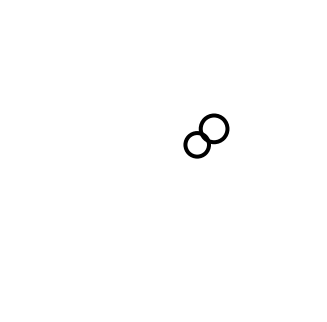

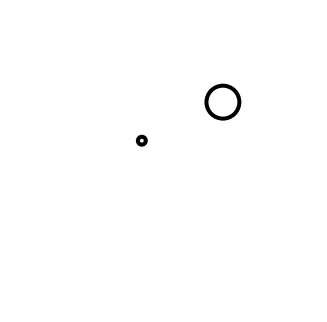

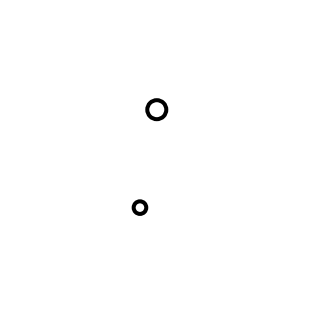

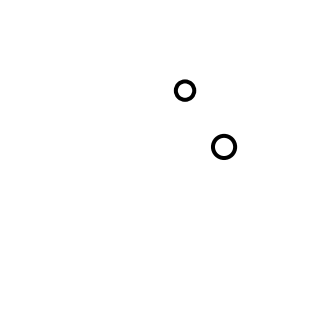

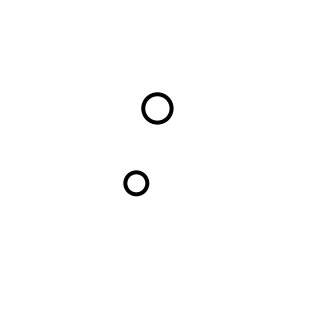

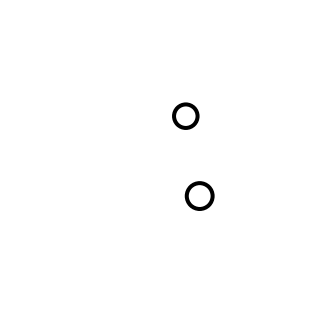

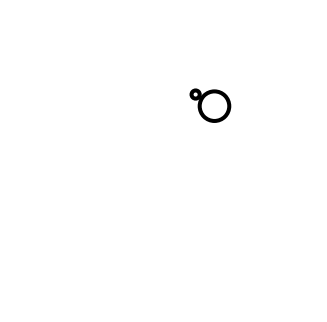

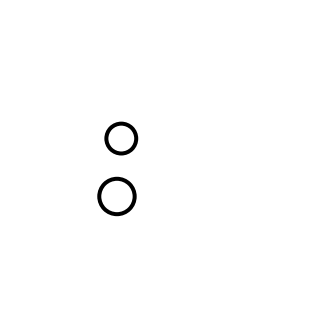

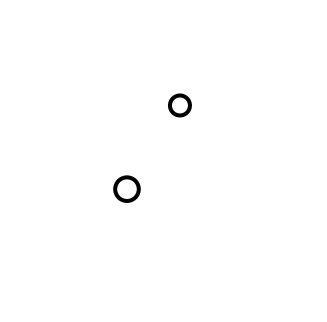

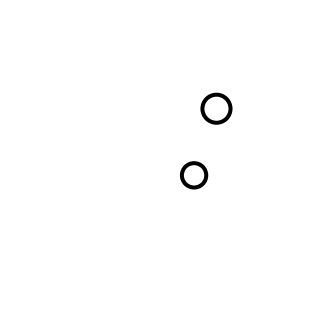

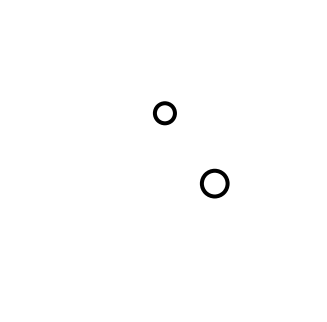

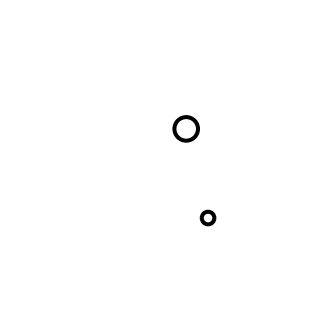

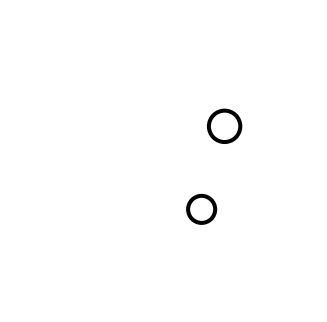

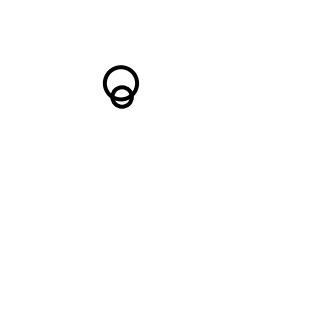

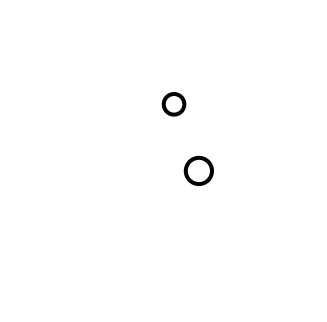

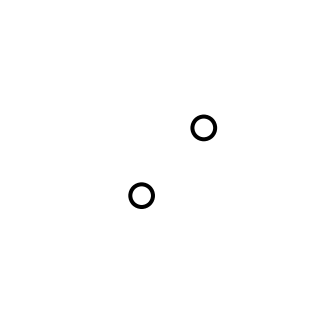

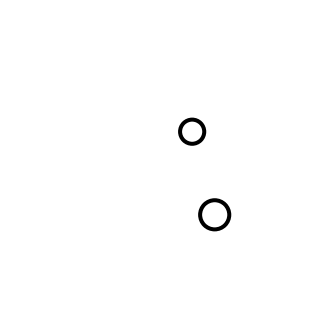

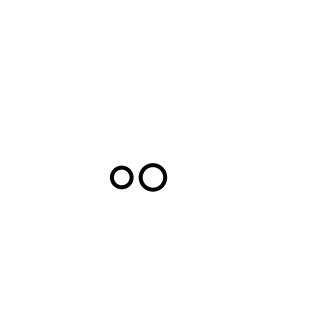

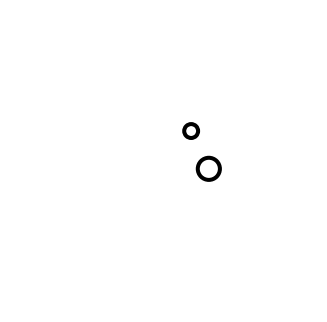

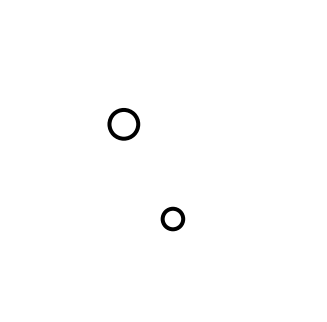

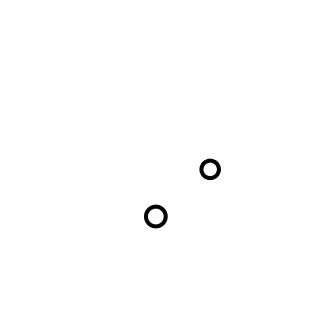

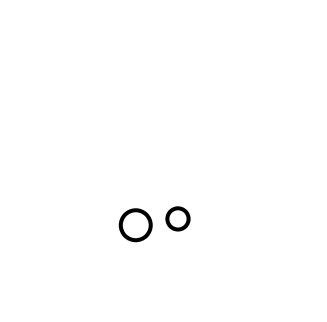

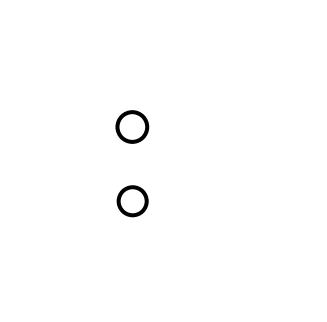

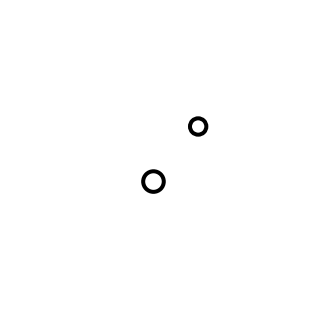

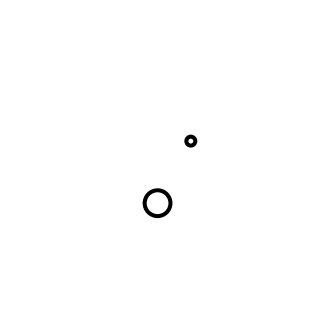

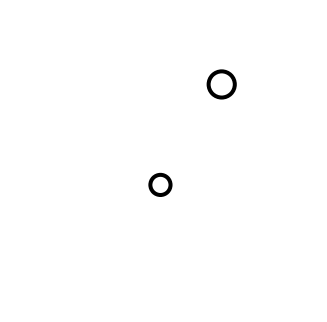

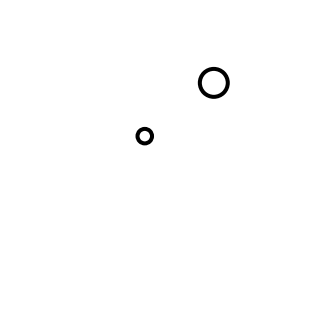

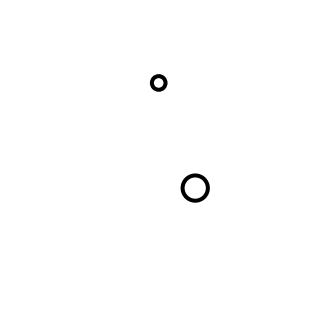

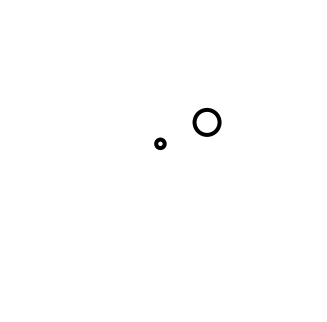

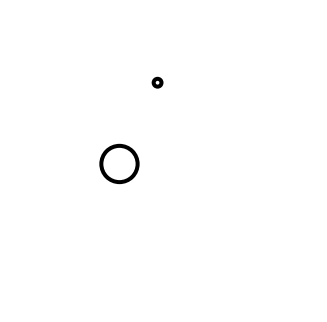

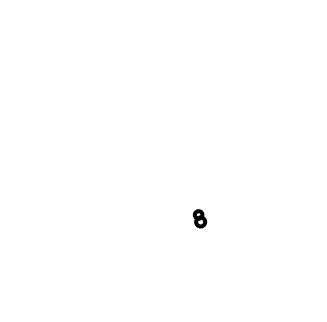

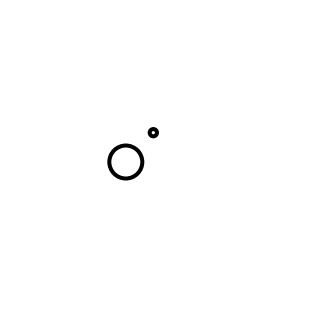

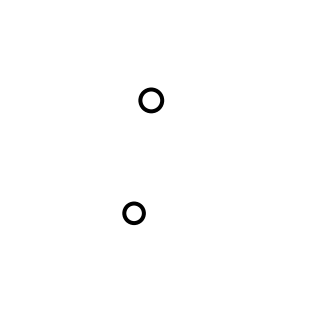

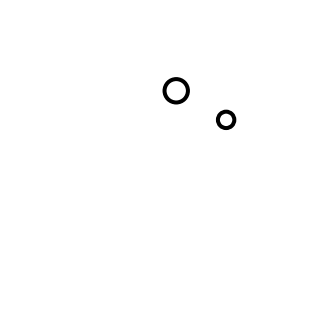

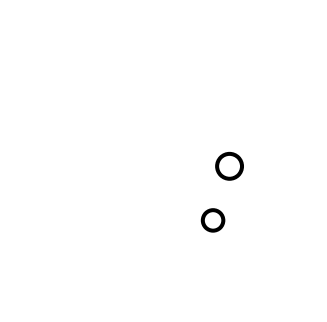

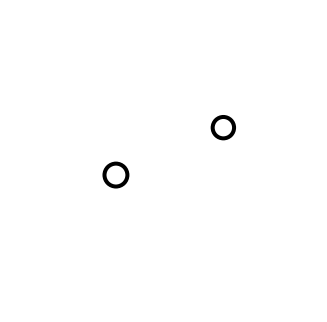

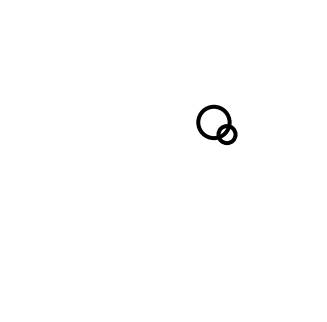

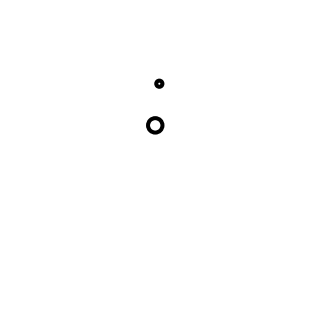

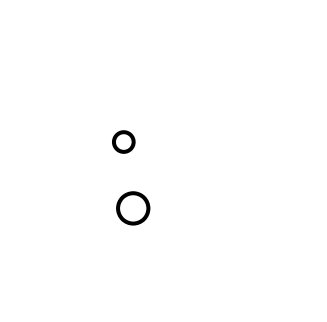

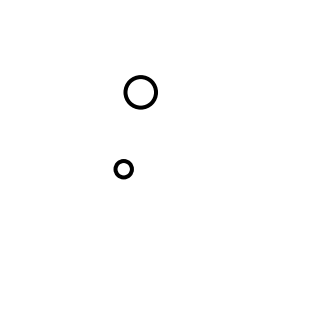

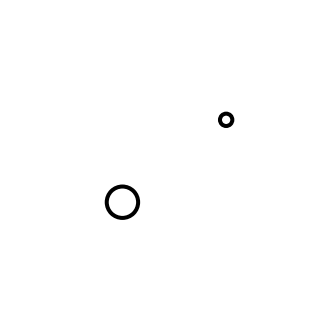

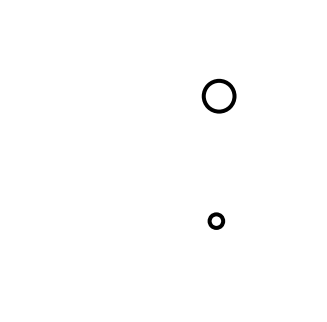

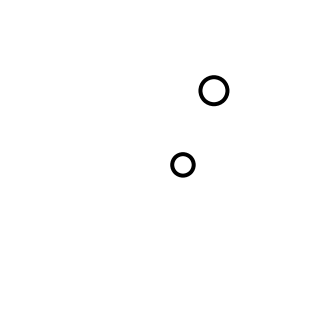

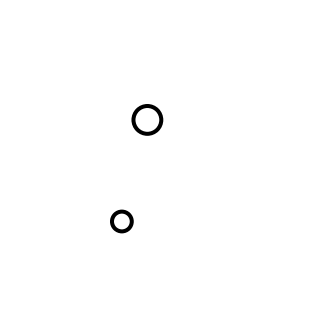

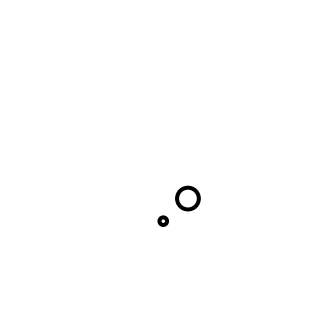

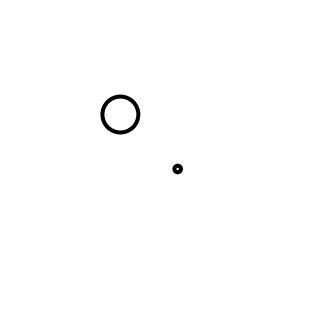

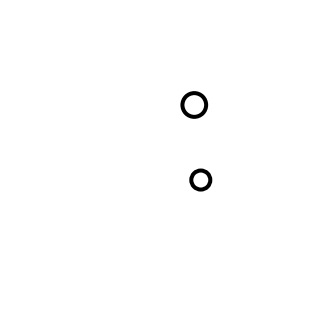

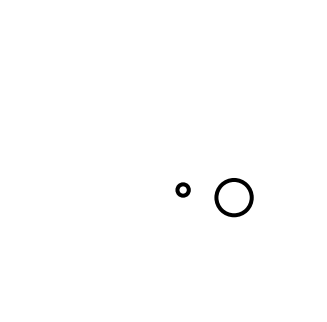

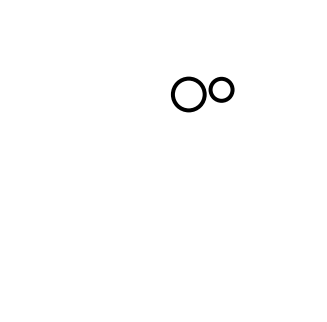

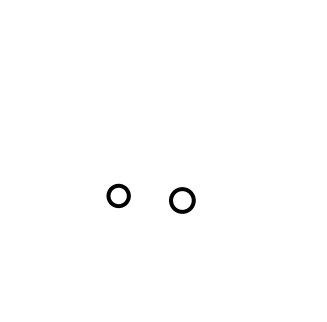

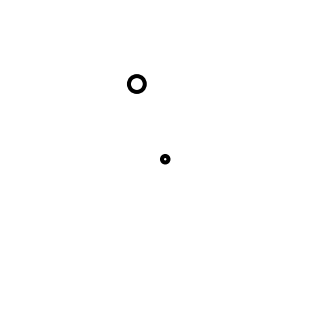

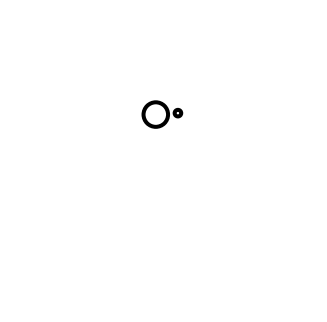

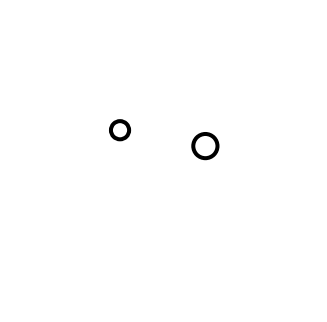

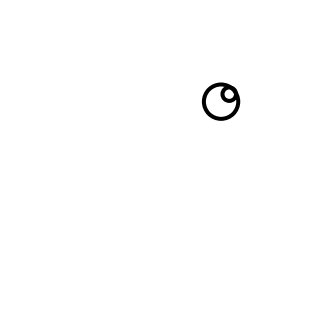

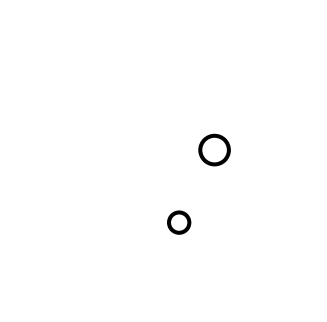

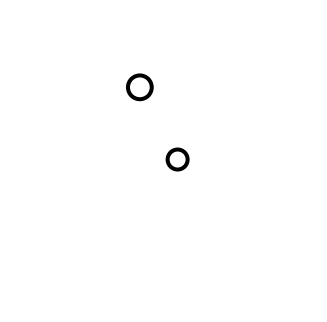

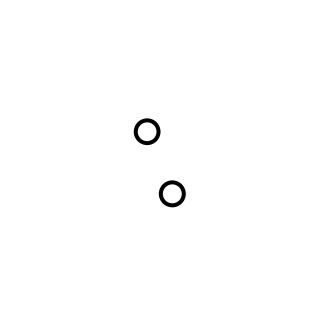

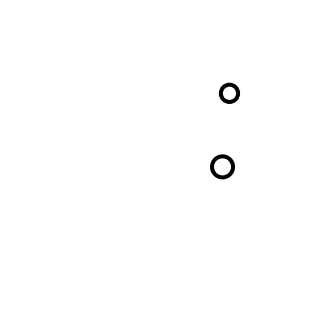

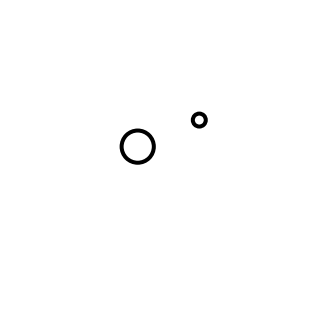

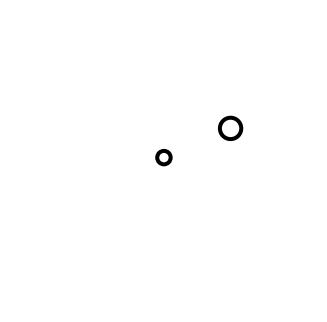

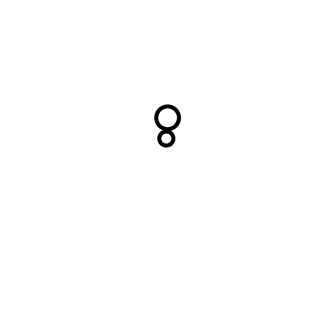

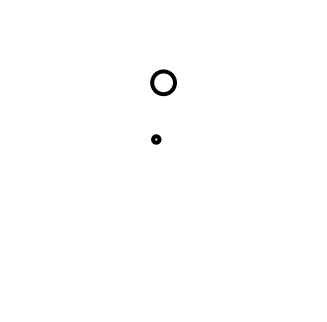

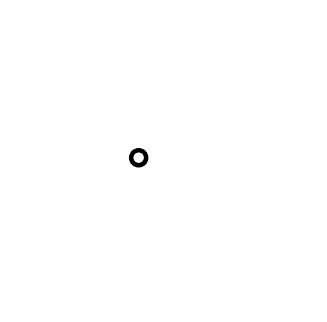

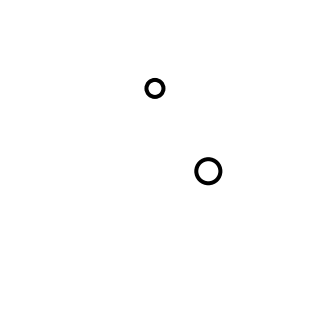

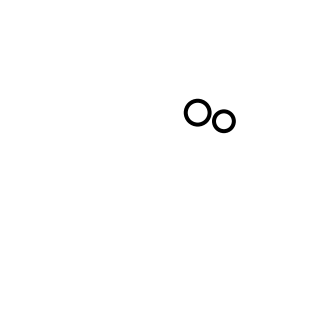

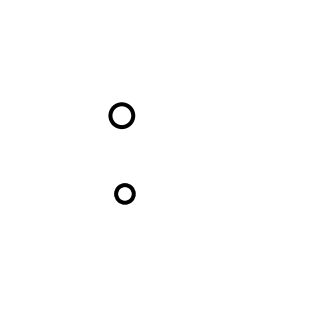

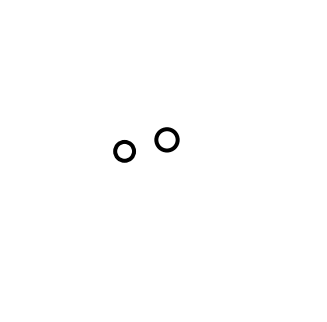

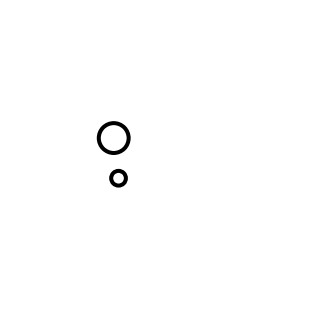

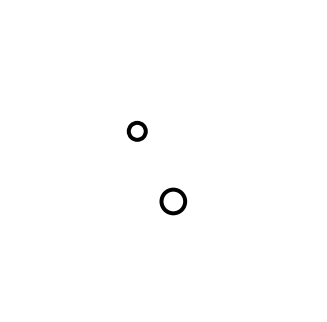

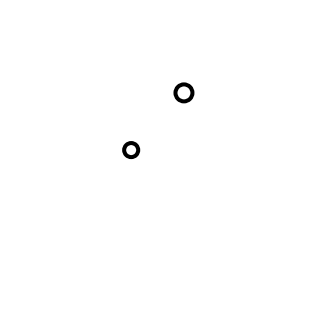

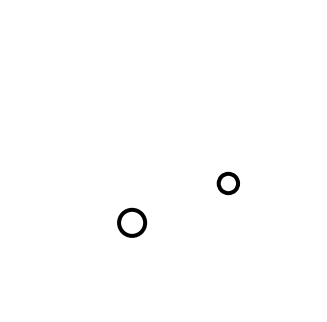

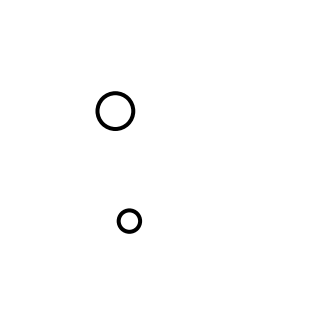

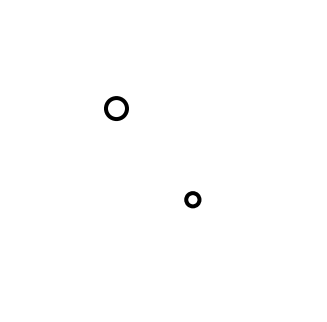

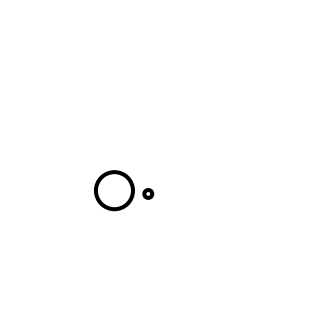

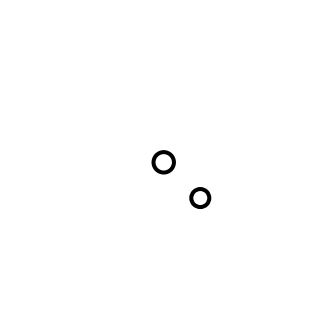

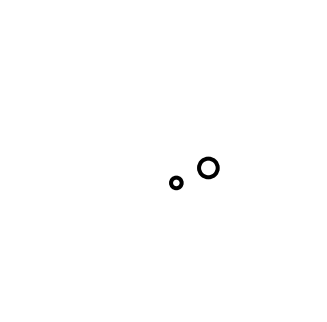

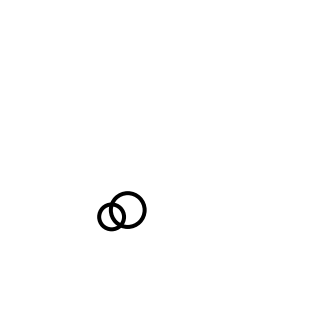

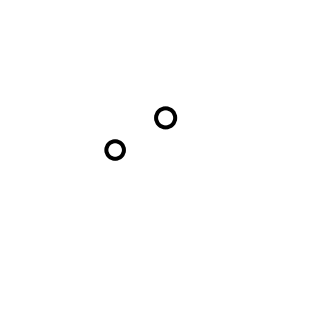

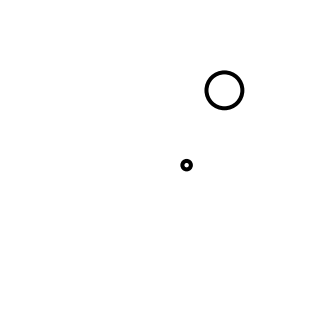

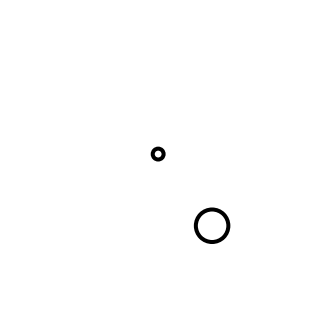

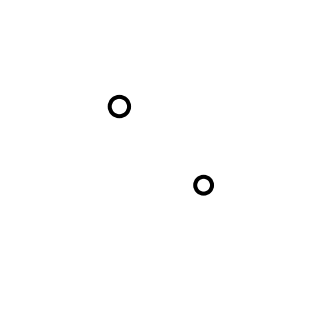

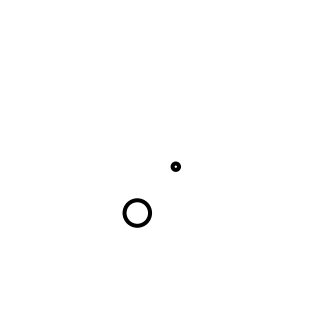

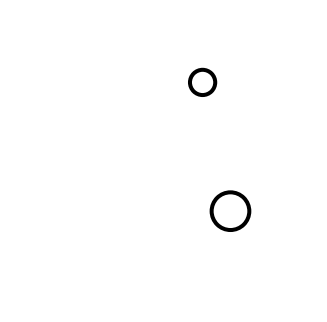

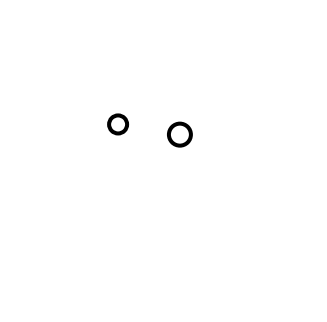

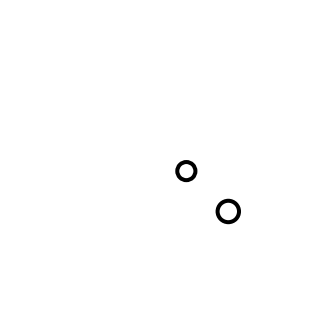

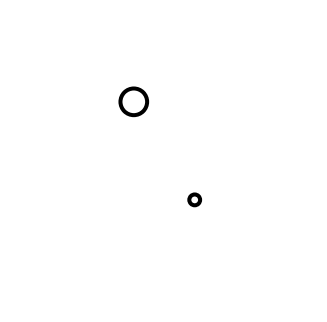

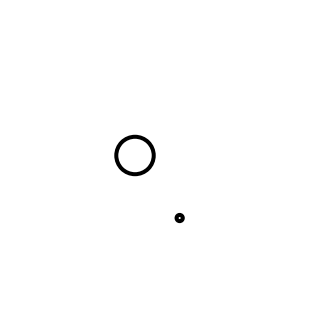

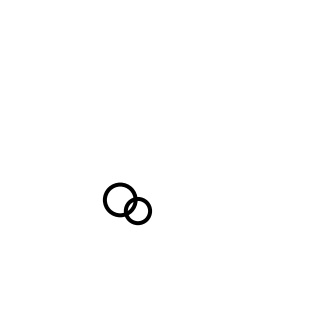

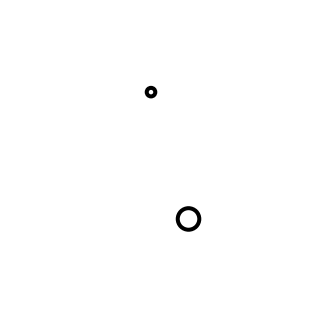

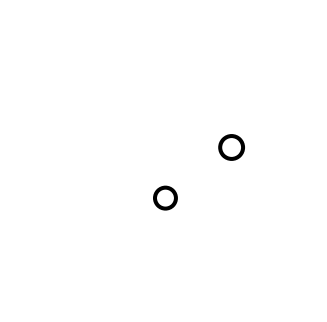

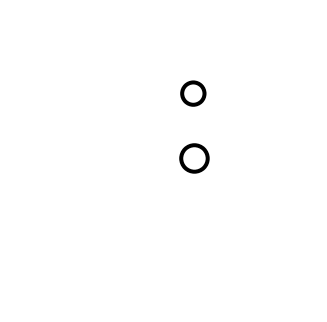

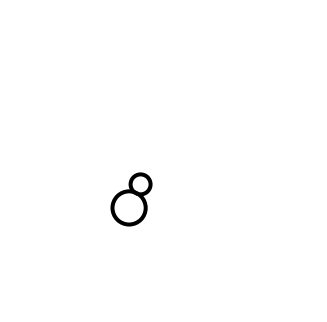

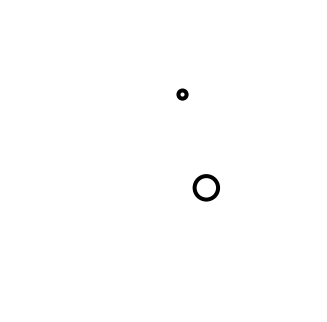

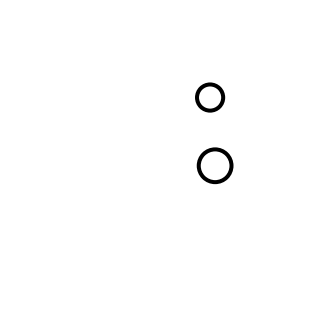

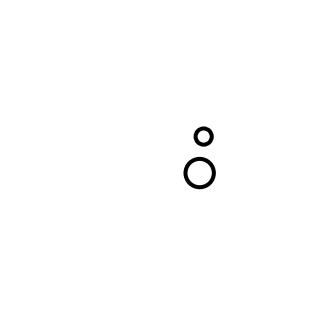

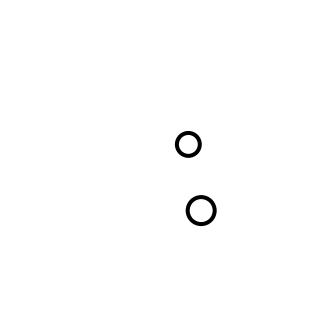

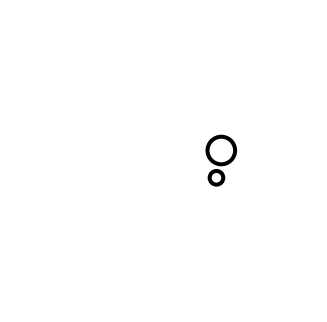

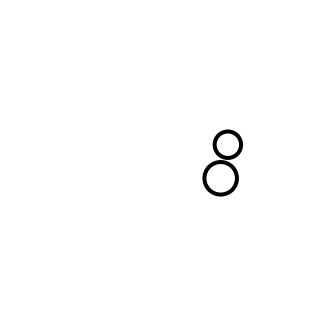

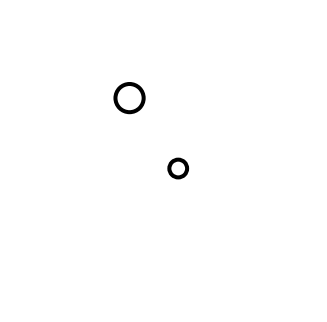

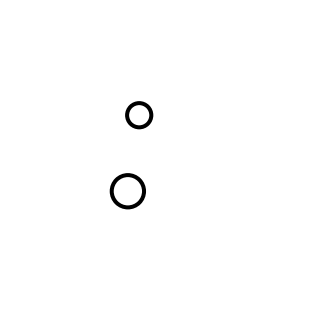

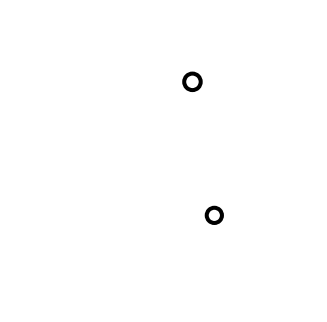

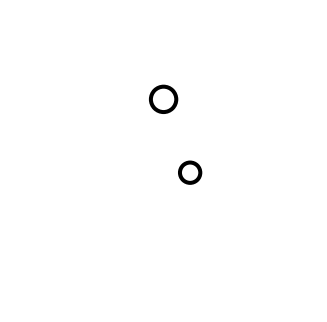

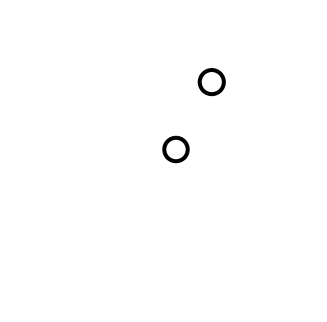

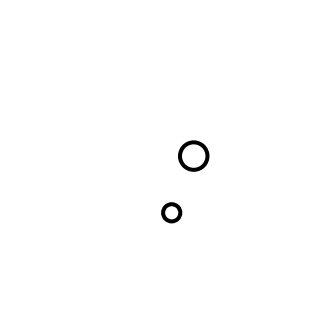

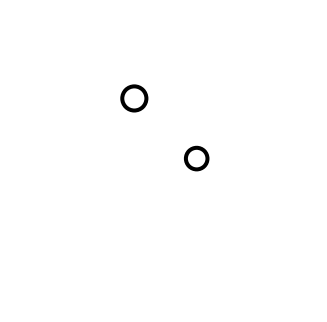

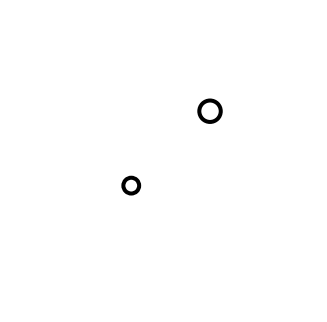

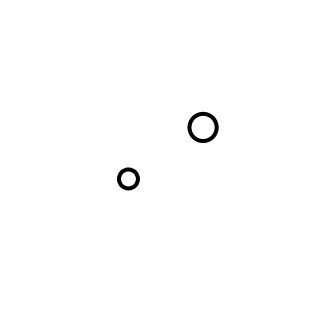

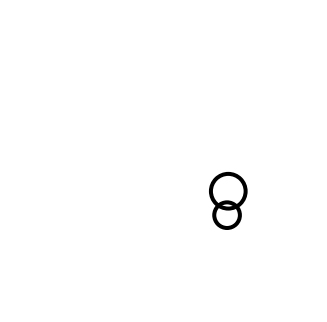

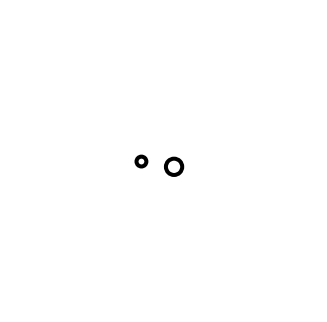

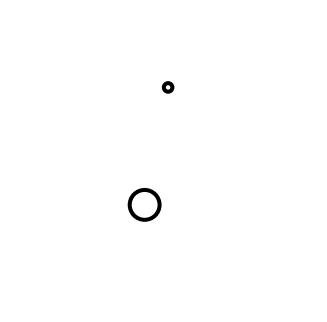

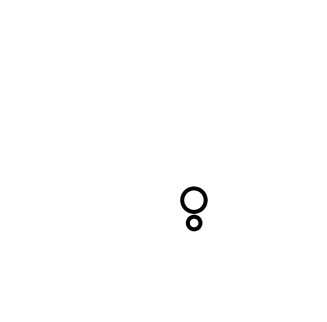

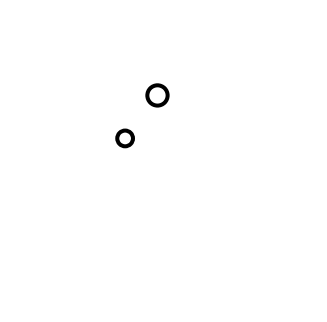

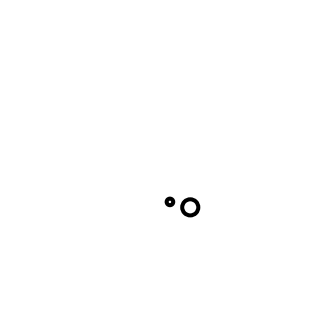

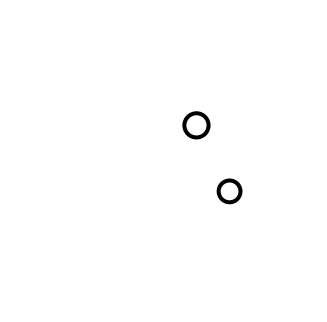

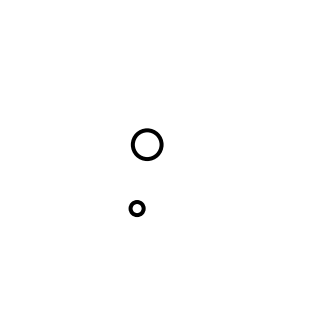

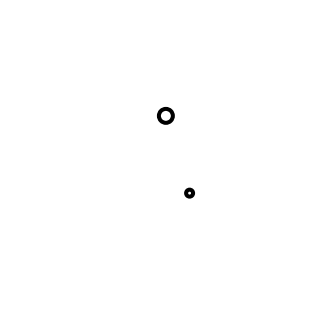

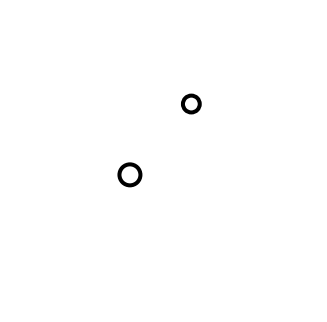

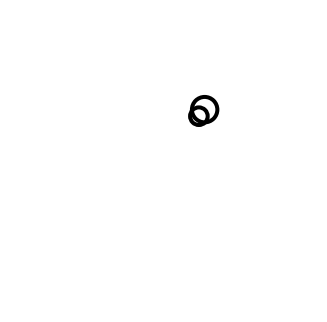

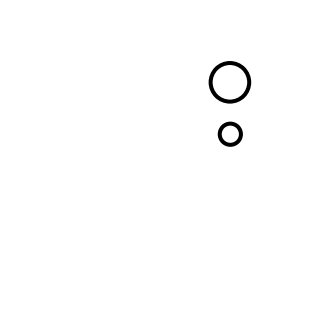

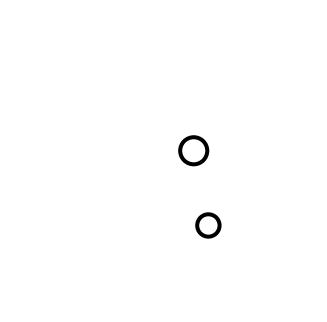

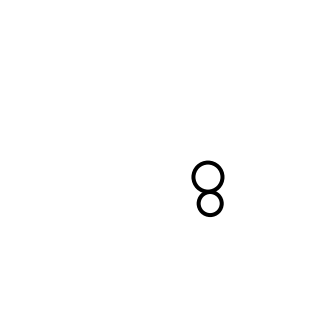

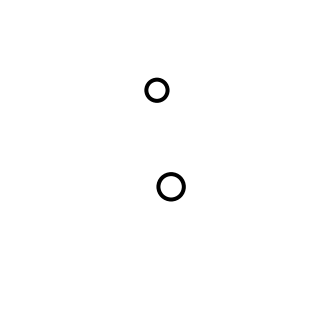

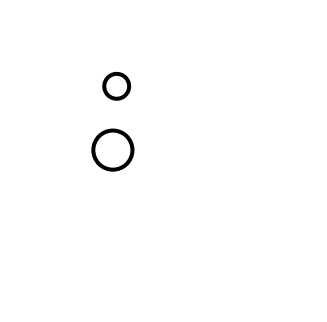

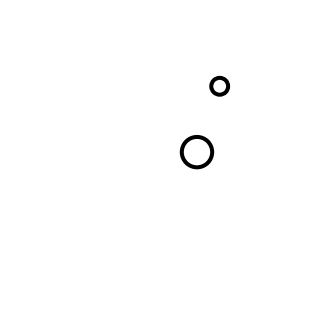

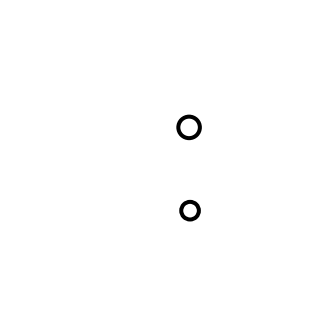

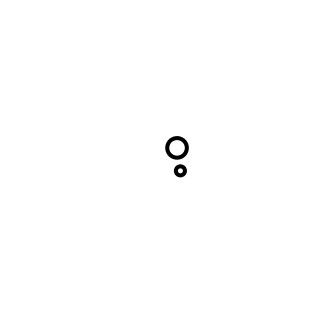

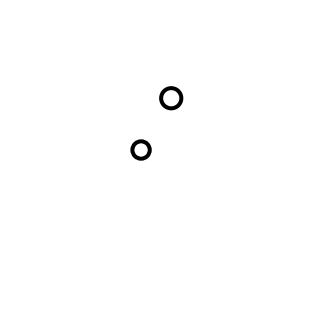

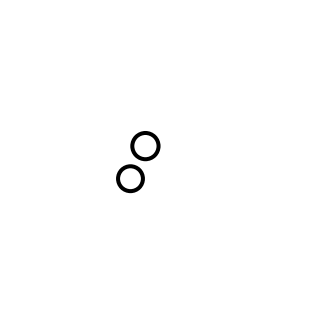

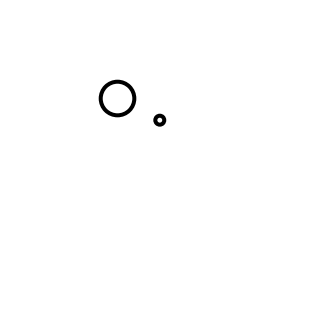

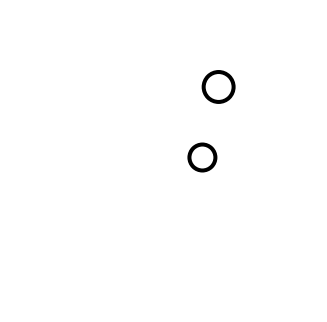

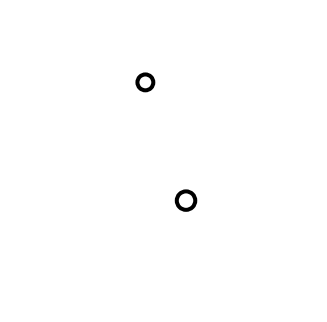

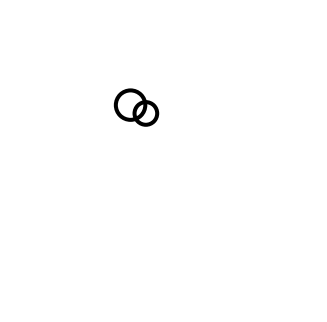

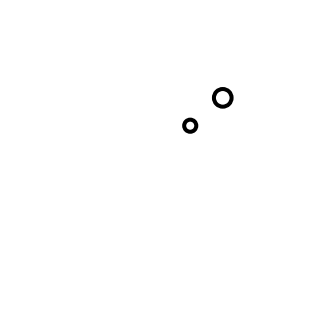

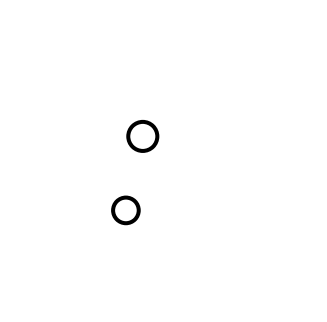

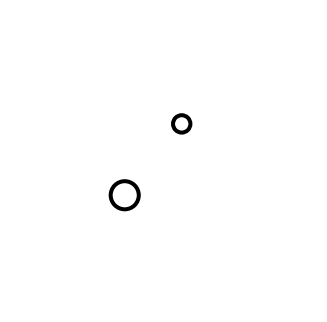

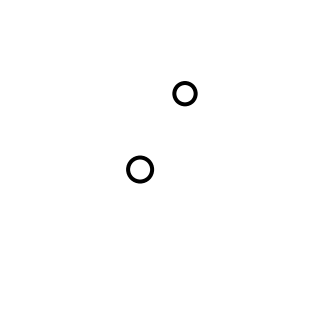

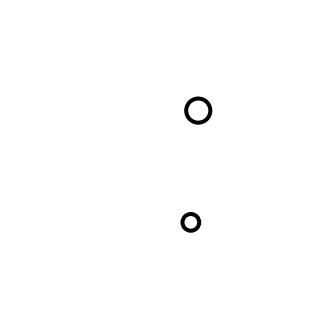

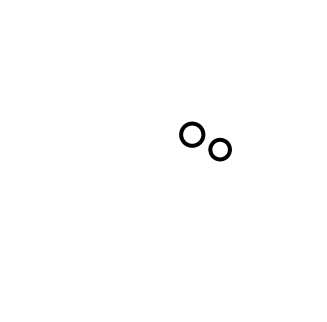

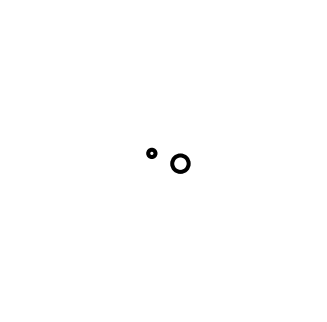

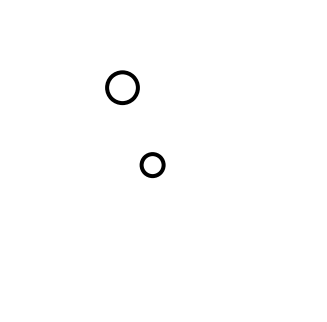

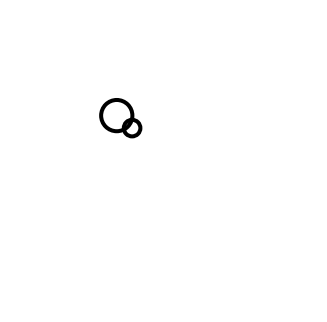

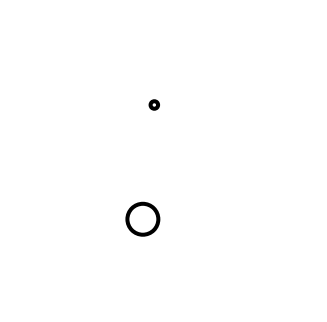

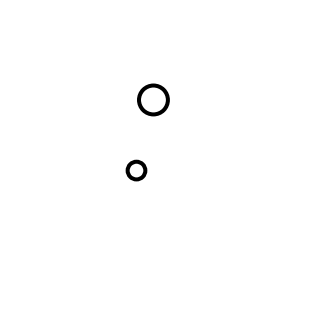

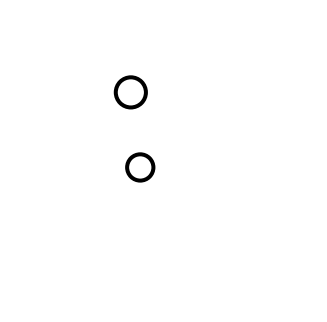

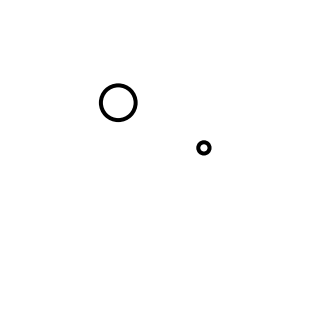

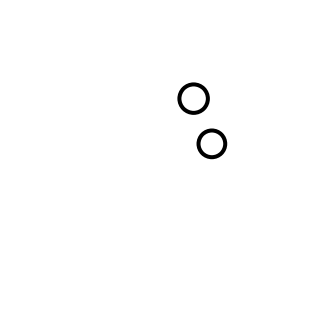

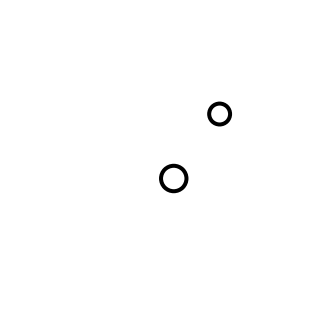

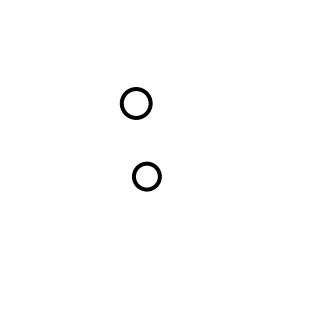

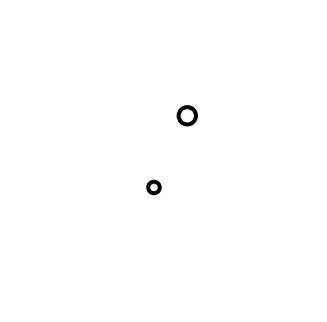

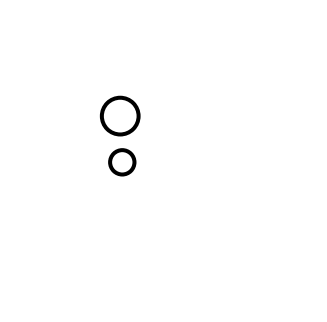

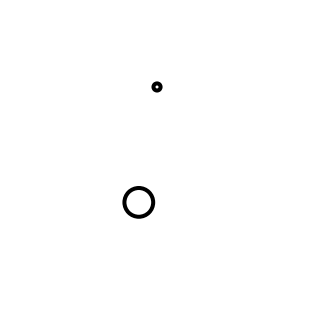

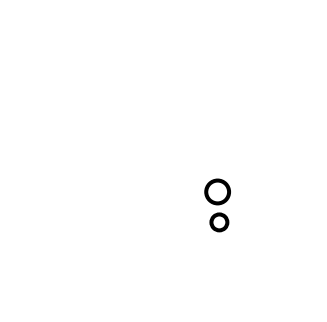

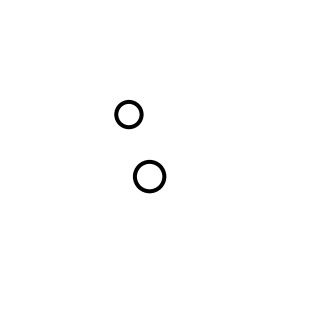

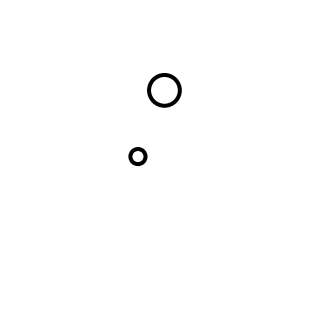

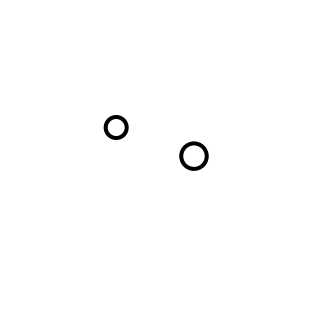

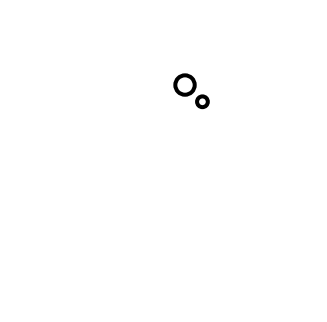

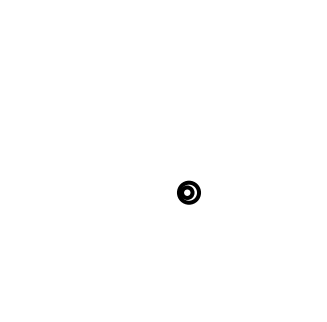

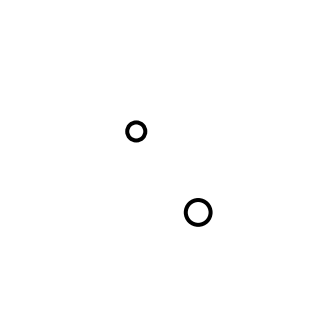

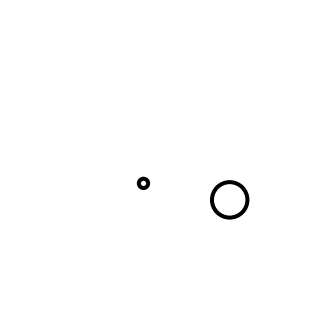

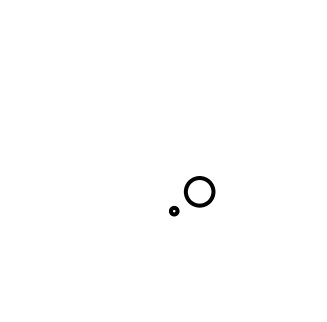

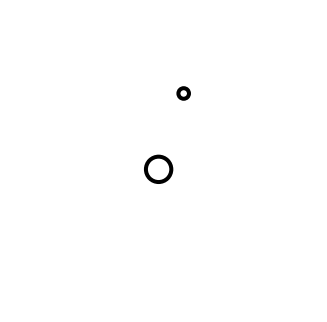

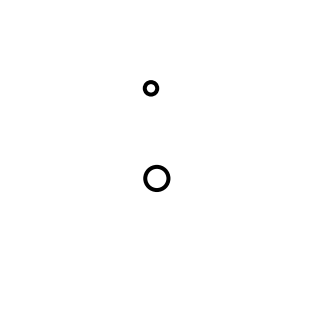

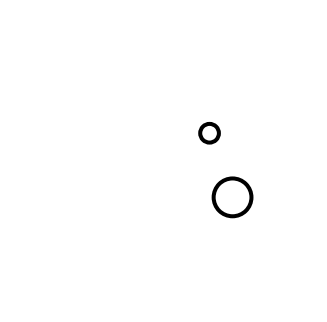

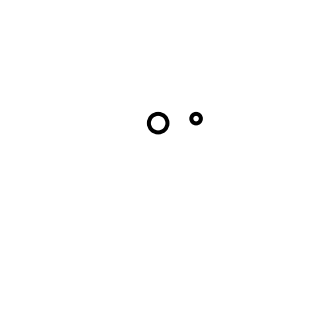

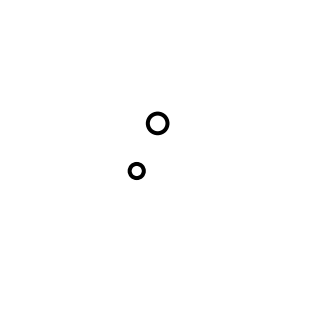

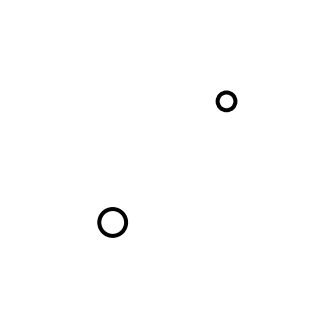

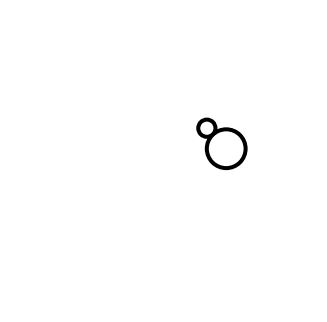

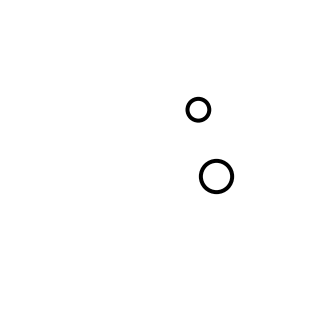

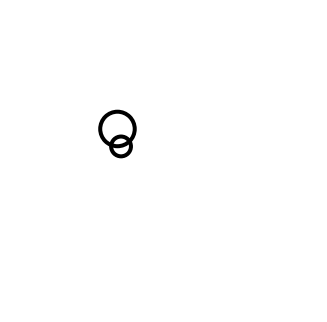

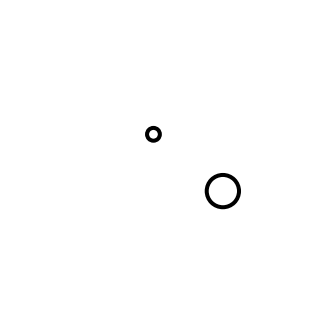

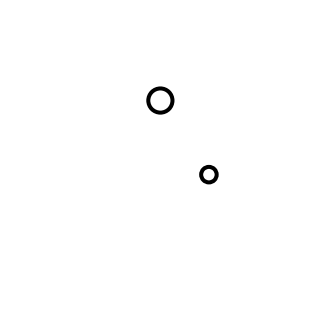

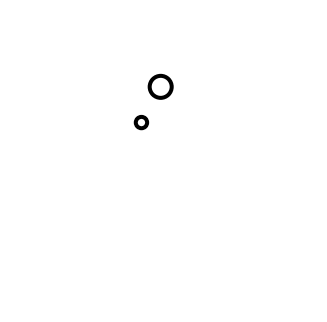

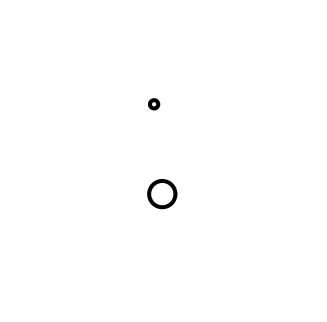

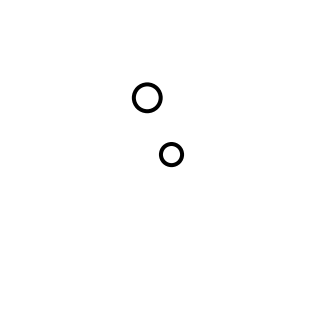

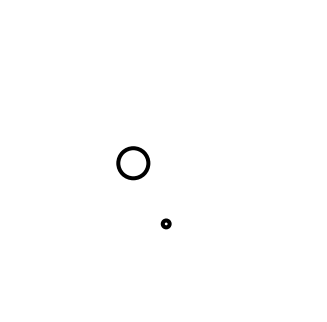

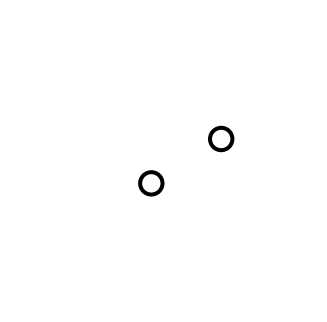

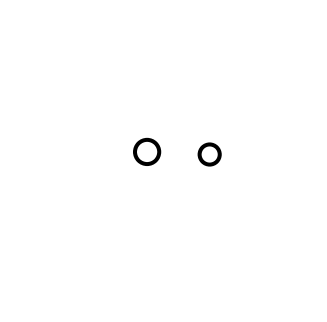

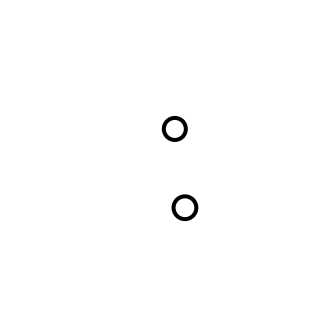

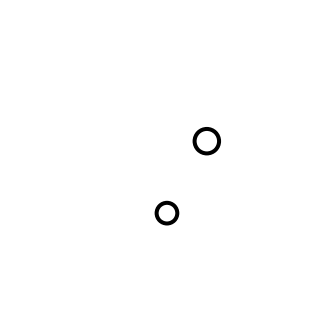

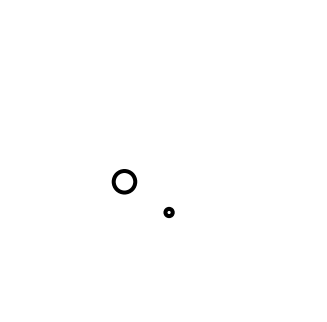

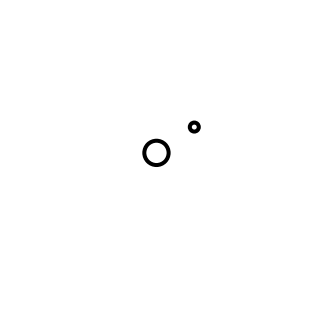

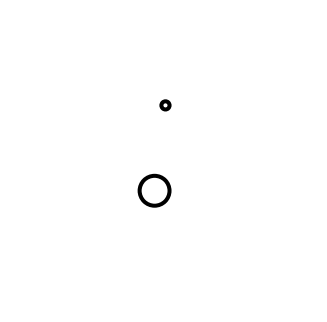

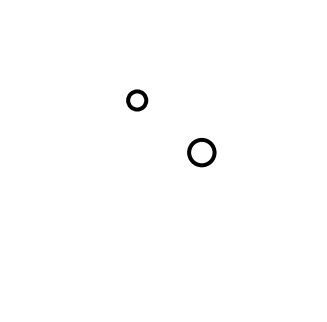

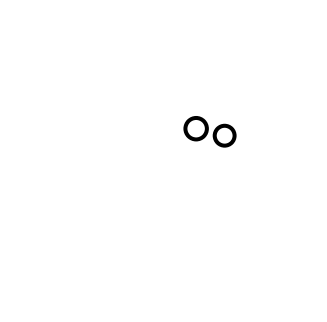

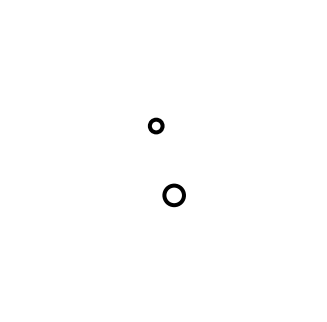

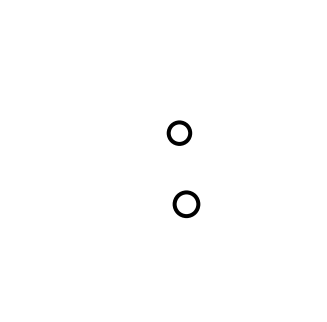

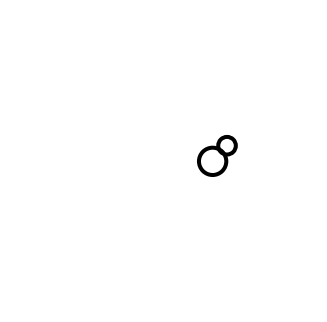

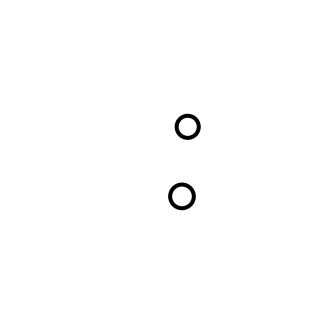

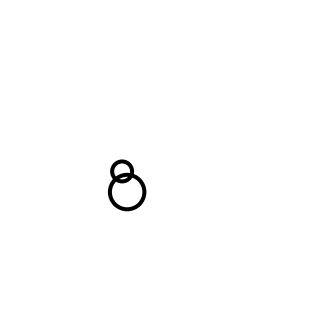

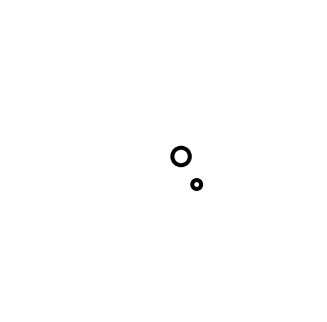

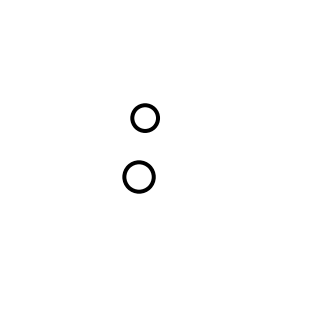

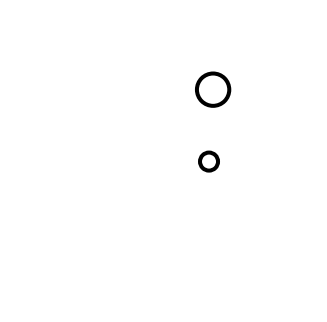

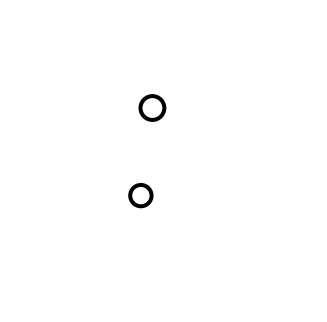

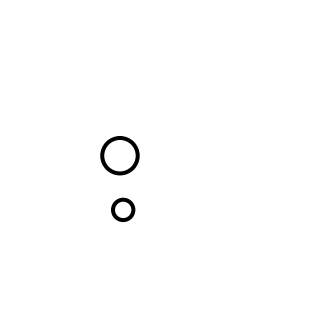

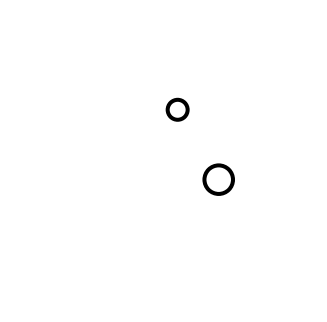

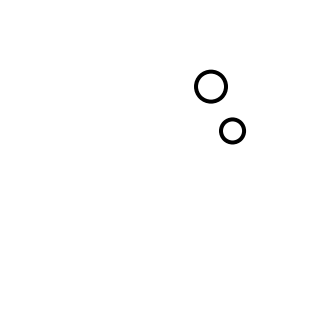

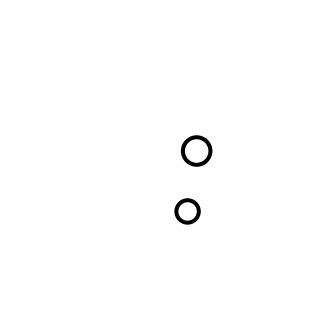

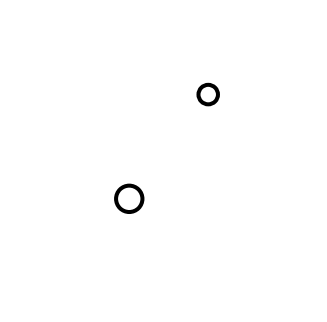

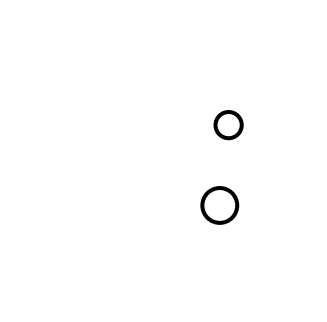

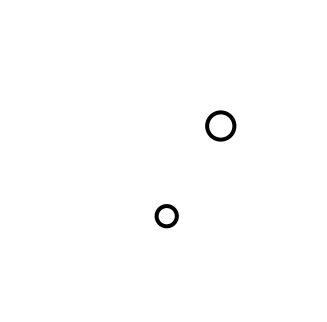

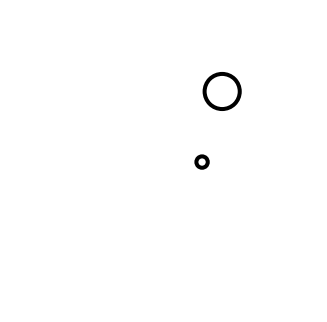

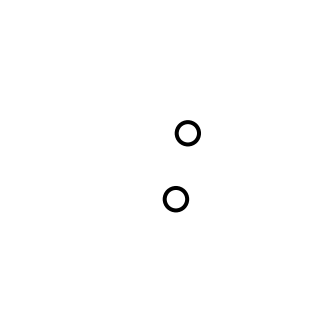

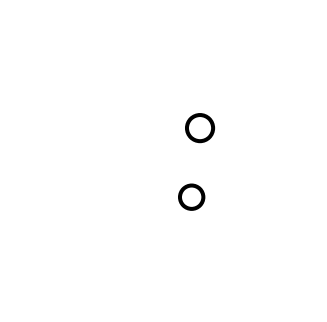

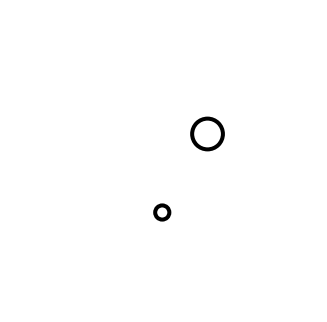

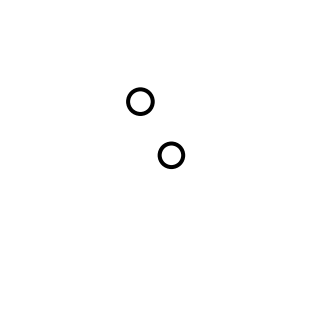

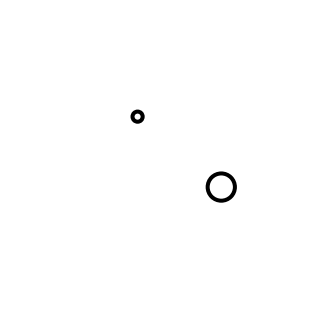

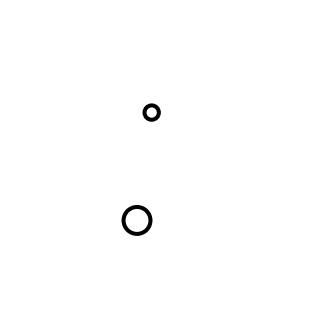

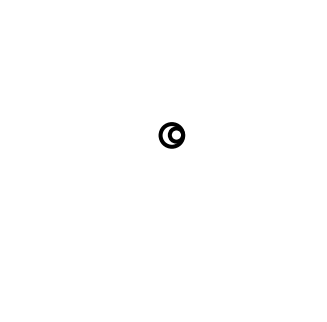

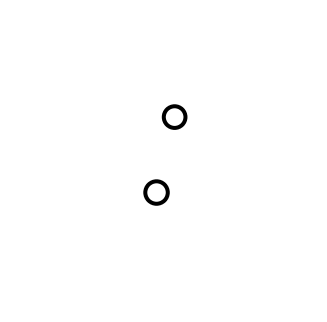

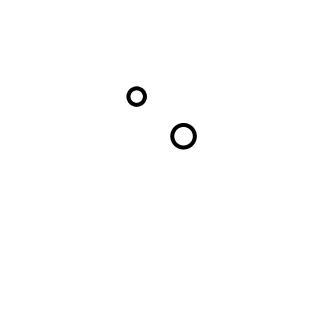

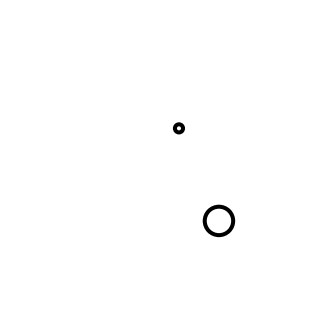

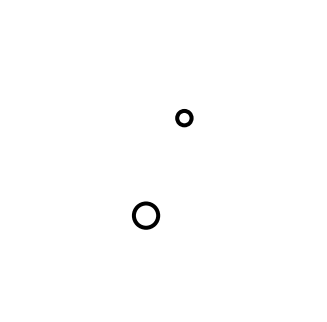

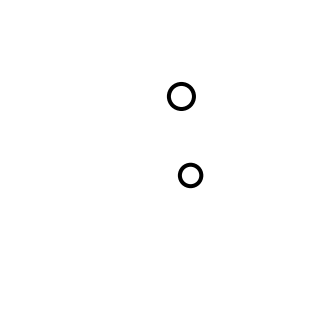

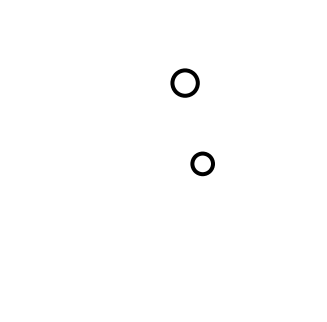

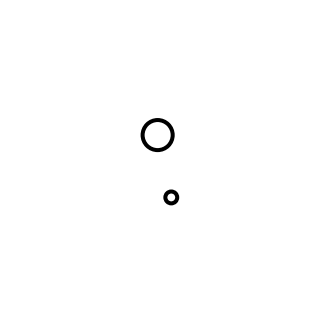

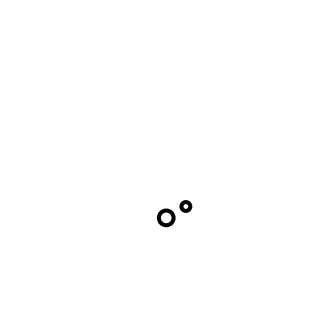

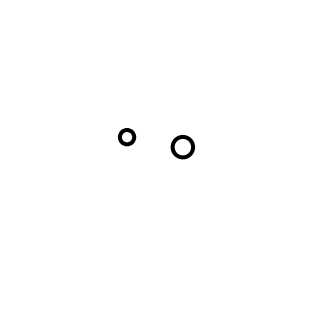

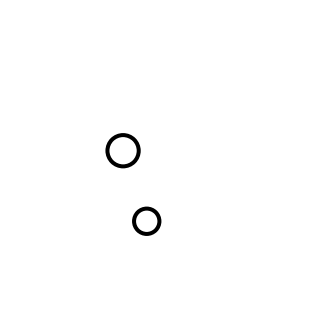

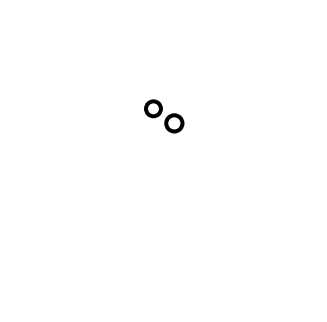

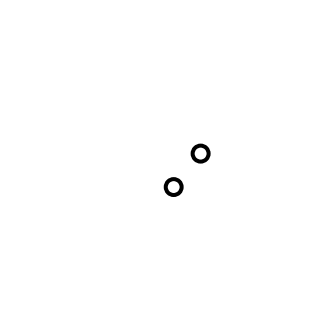

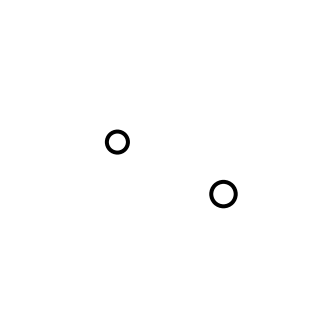

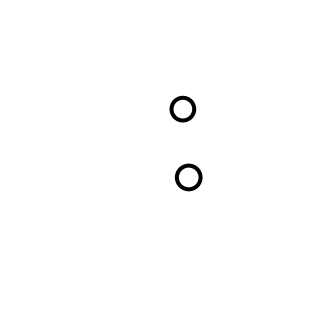

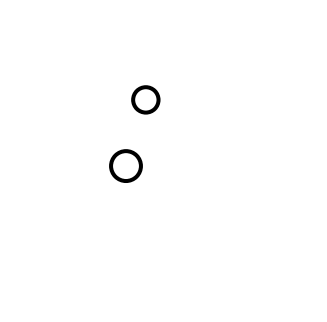

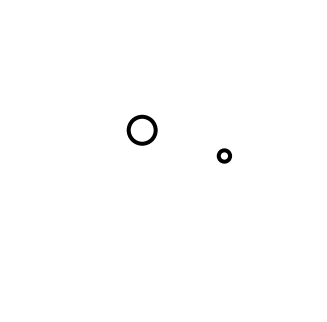

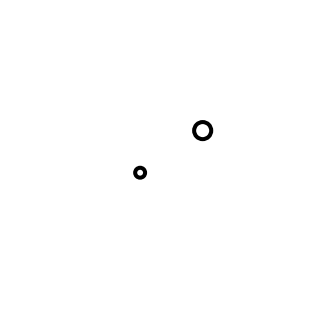

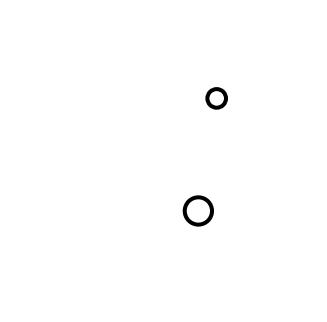

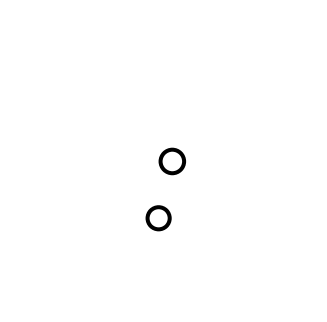

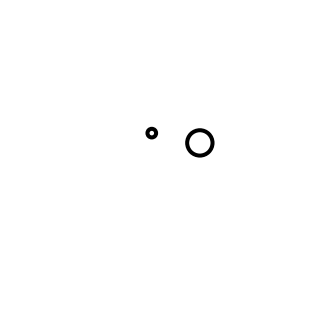

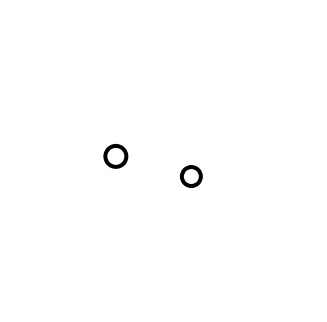

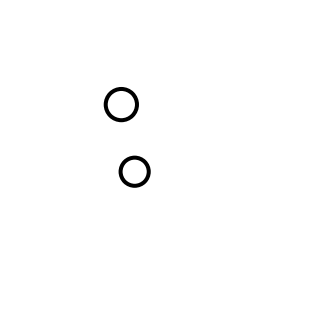

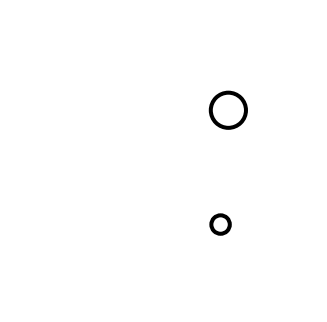

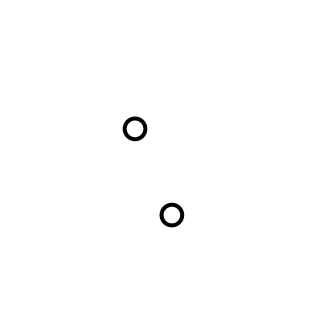

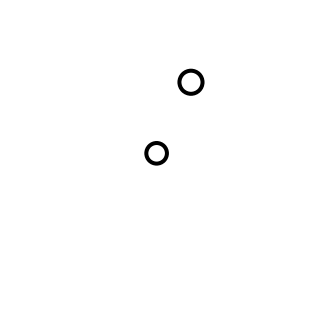

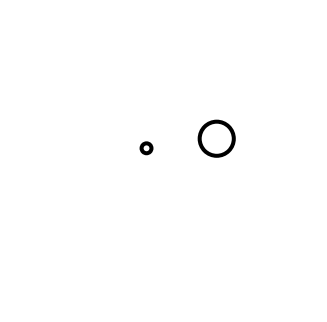

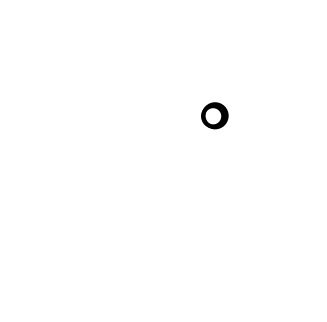

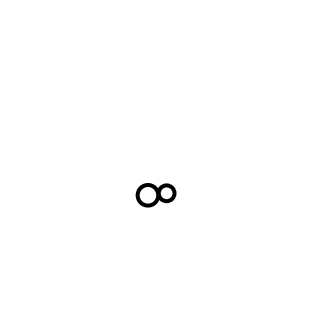

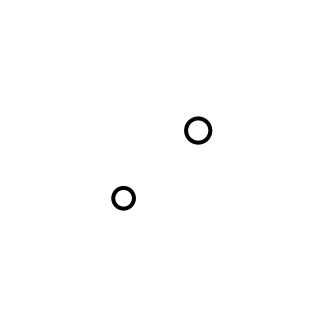

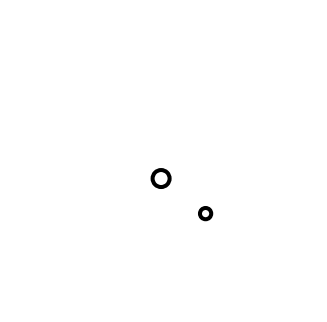

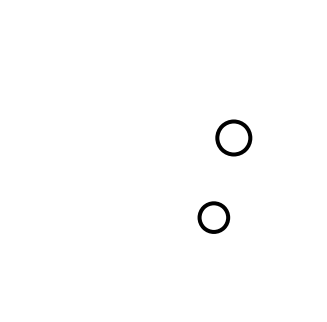

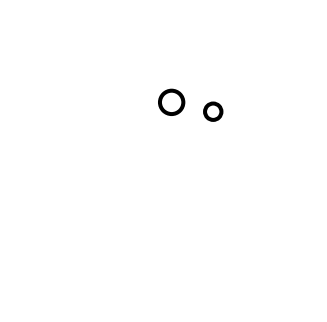

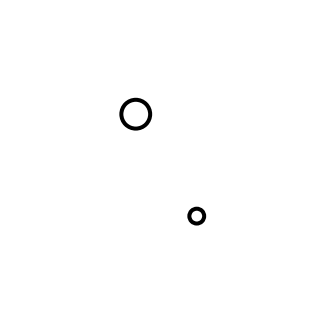

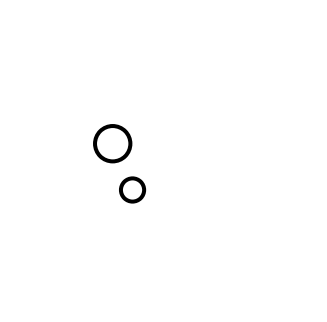

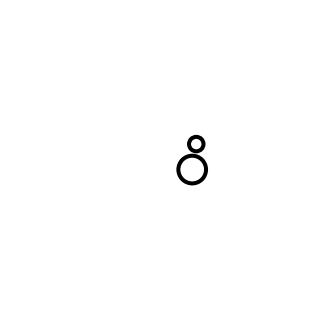

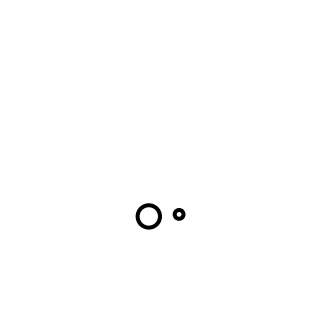

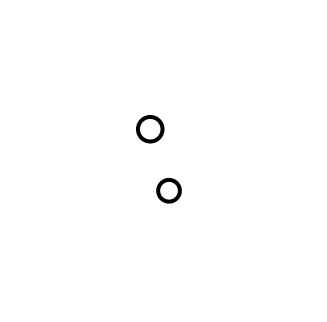

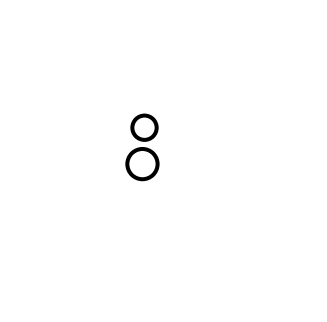

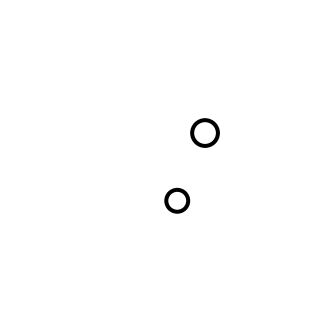

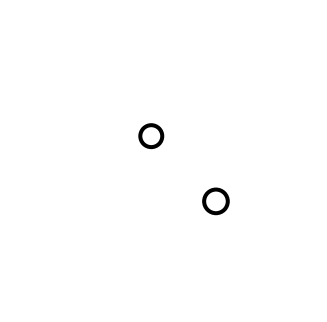

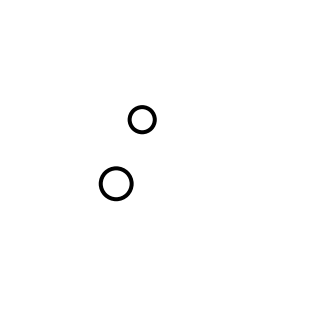

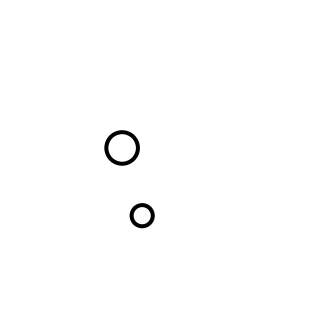

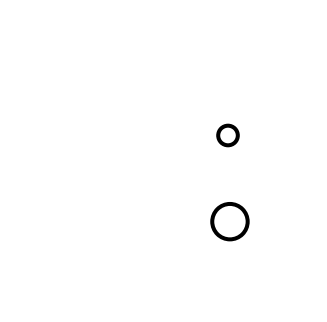

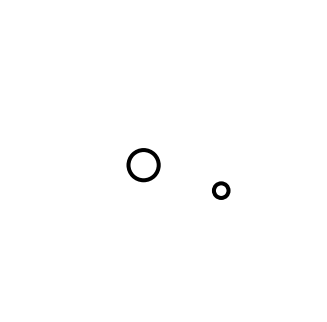

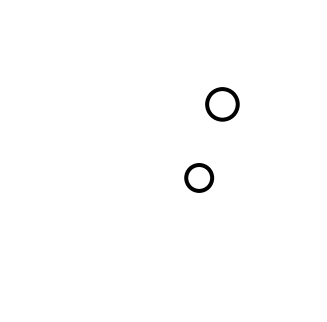

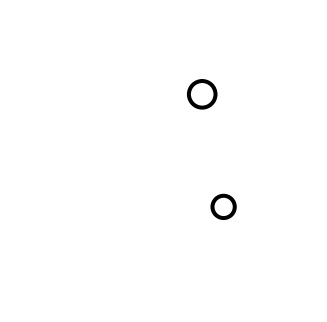

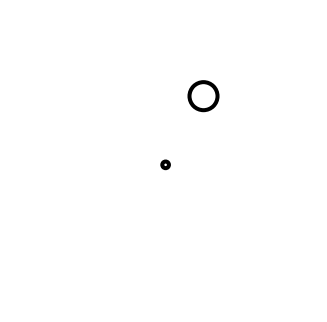

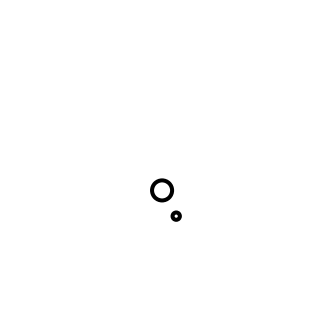

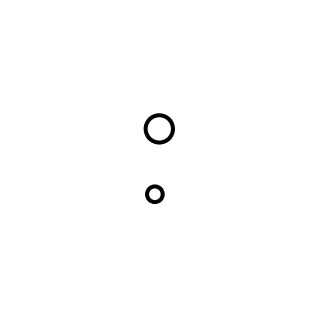

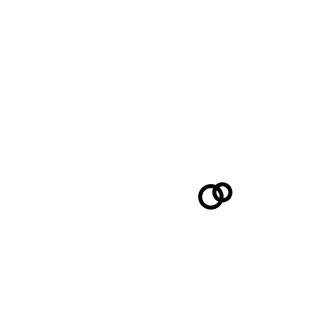

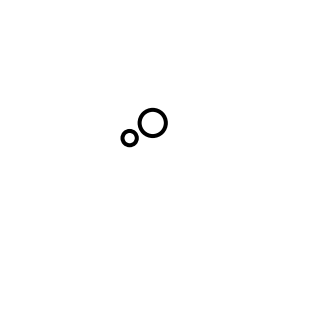

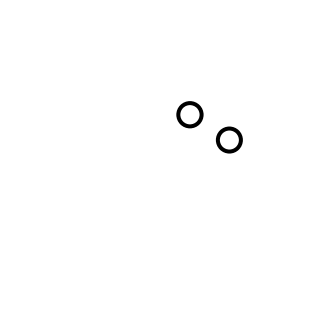

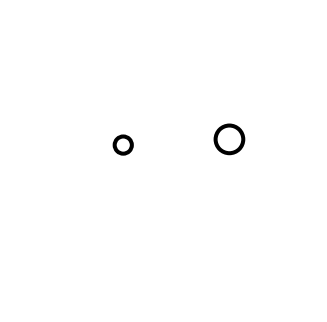

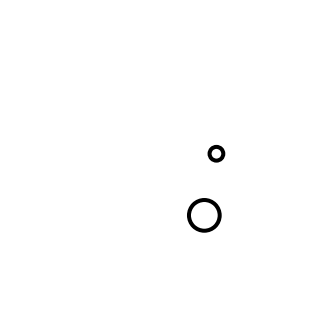

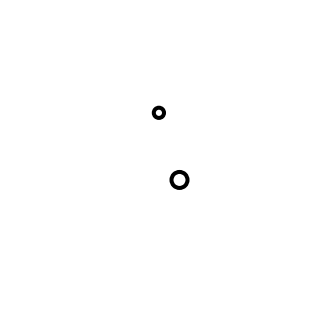

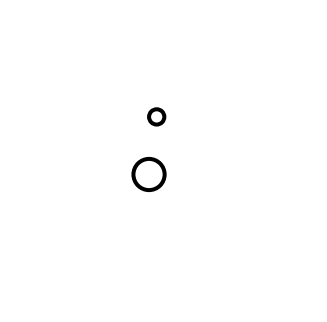

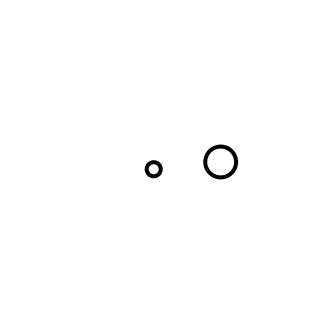

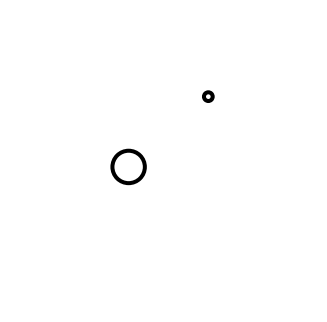

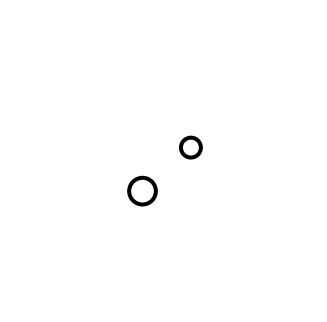

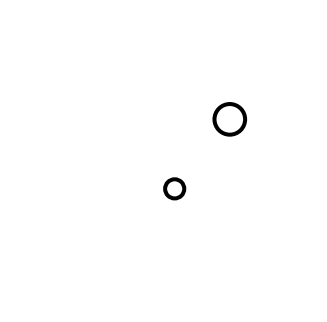

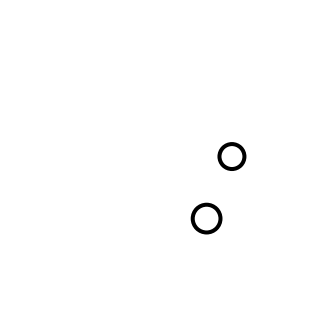

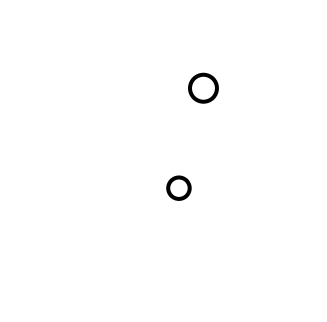

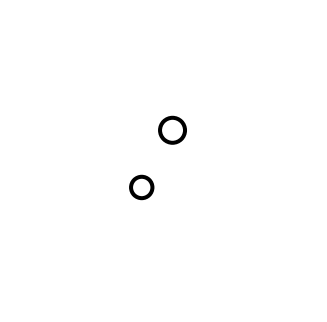

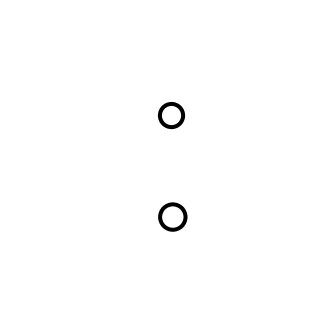

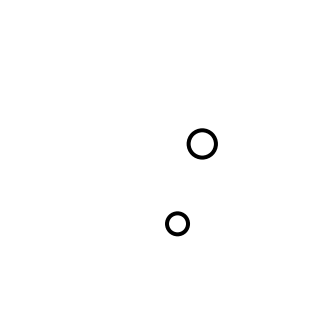

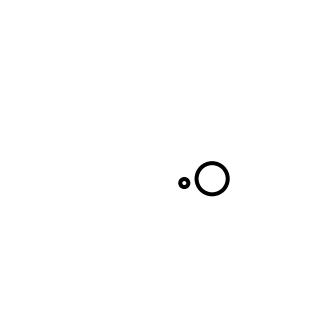

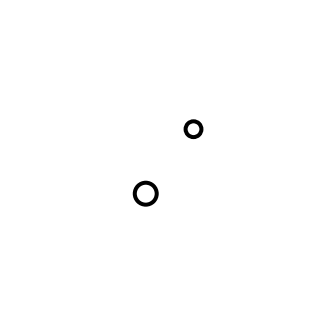

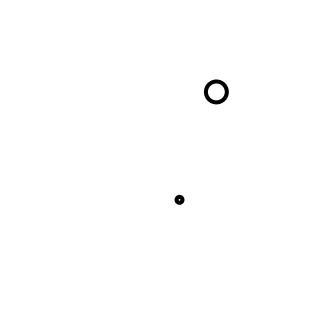

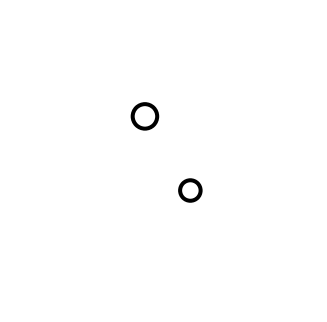

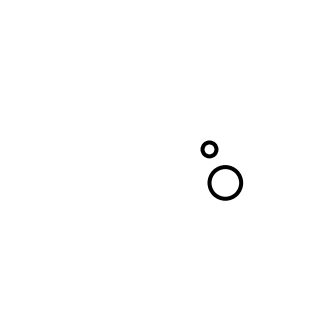

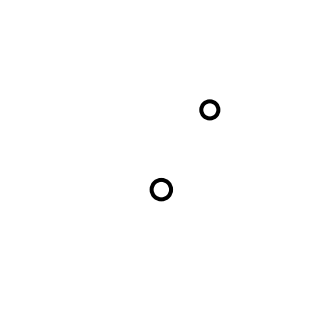

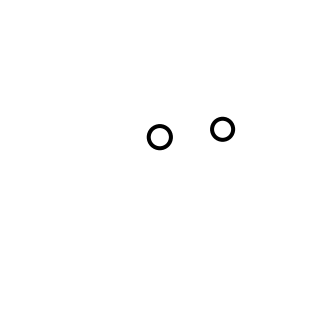

In [10]:
masa_invariante_prueba = invariant_mass(Eta_prueba,Phi_prueba,Pt_prueba,Energia_prueba) 

In [14]:
masa_invariante_prueba = invariant_mass(Eta_prueba,Phi_prueba,Pt_prueba,Energia_prueba) 

<Figure size 10000x10000 with 0 Axes>

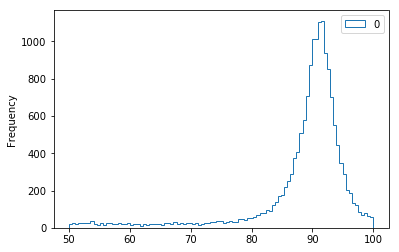

In [16]:
Histogram(masa_invariante_prueba,'masa_invariante')